# Manuscript Supplementary Figures 
_Note_: This Notebook loads cached final results from .pkl files (see './cache/'). Complete results (tracked history and MlFlow artifacts) can be loaded from MlFlow
by executing ('make_plot_bar.py', etc.)

## Results

### Representations

In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
from gpflow.kernels import SquaredExponential, Matern52, Linear
from data.train_test_split import PositionSplitter, RandomSplitter, BioSplitter, OptimizationSplitter, FractionalRandomSplitter
from protocol_factories import FractionalSplitterFactory
from algorithms import GPonRealSpace, KNN, RandomForest, UncertainRandomForest
from util.mlflow.constants import ONE_HOT, EVE, EVE_DENSITY, TRANSFORMER, ESM, NO_AUGMENT
from util.mlflow.constants import MSE, SPEARMAN_RHO, LINEAR, MLL, GP_L_VAR, STD_Y
from make_plot_bar import load_cached_results
from make_plot_bar import plot_metric_comparison_bar
from make_plot_bar import plot_mutation_comparison_matrix
from make_plot_bar import plot_metric_comparison_bar_param_delta
from make_plot_optimization import plot_optimization_results
from make_plot_cumulative_regression import plot_cumulative_comparison
from visualization.plot_metric_for_uncertainties import plot_uncertainty_eval

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-06-29 15:29:52.240688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-29 15:29:52.240800: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({
"text.usetex": False,
"font.family": "sans-serif"})

In [3]:
DATASETS = ["1FQG", "UBQT", "TIMB", "MTH3", "BRCA"]
REPRESENTATIONS = [ONE_HOT, EVE, EVE_DENSITY, TRANSFORMER, ESM]
RANDOM_SEEDS = [11, 42, 123, 54, 2345, 987, 6538, 78543, 3465, 43245]
ALGORITHMS = [GPonRealSpace().get_name(), GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(), GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(),
             RandomForest().get_name(), KNN().get_name()]
PROTOCOLS = [RandomSplitter("1FQG"), PositionSplitter("1FQG")]
METRICS = [MSE, SPEARMAN_RHO]

Regressor: GPlinear 



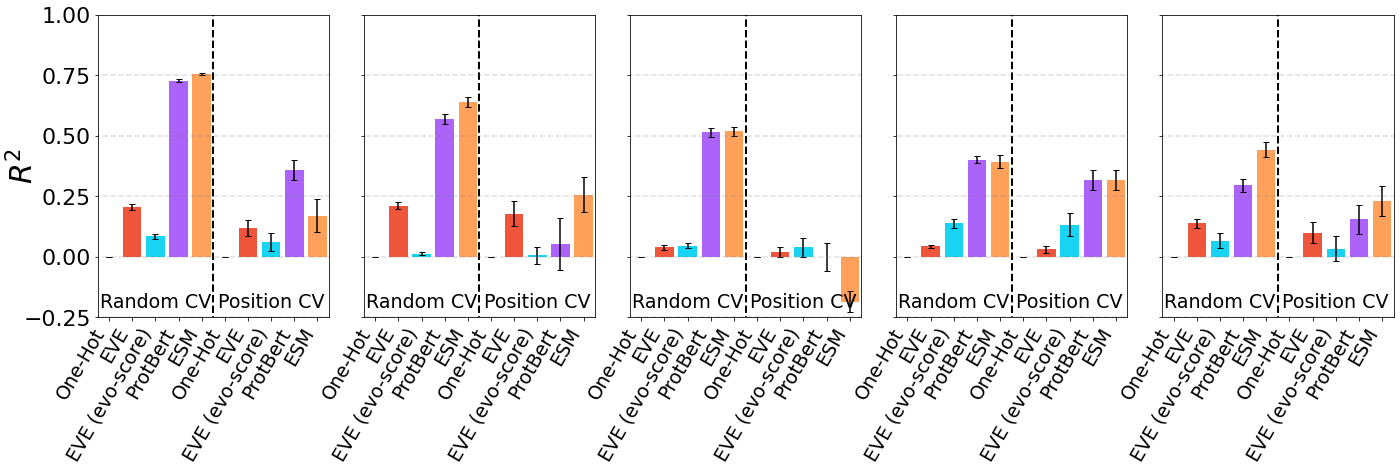

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


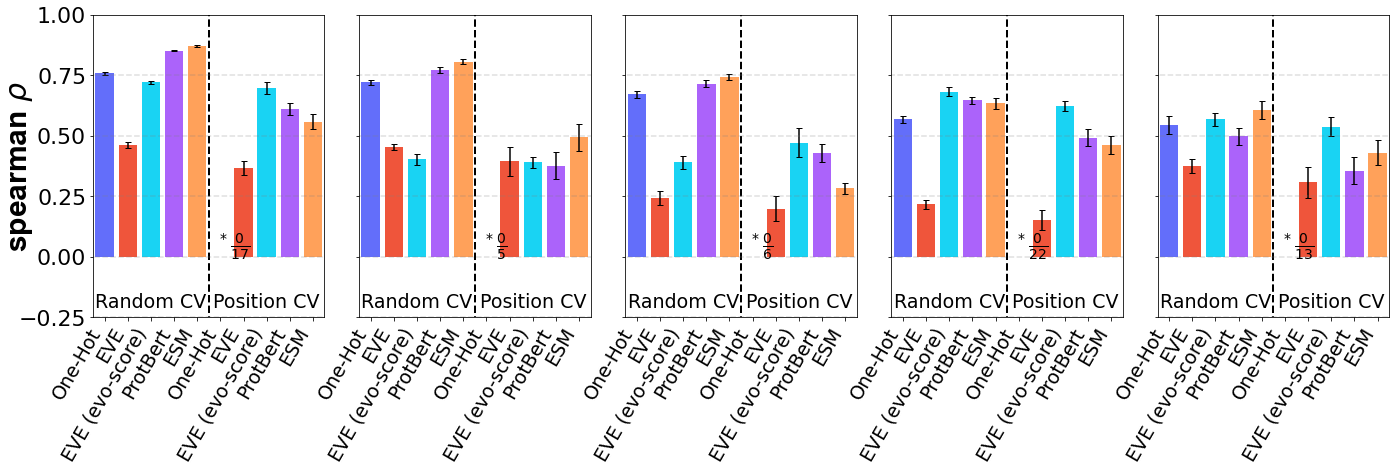

Regressor: GPsquared_exponential 



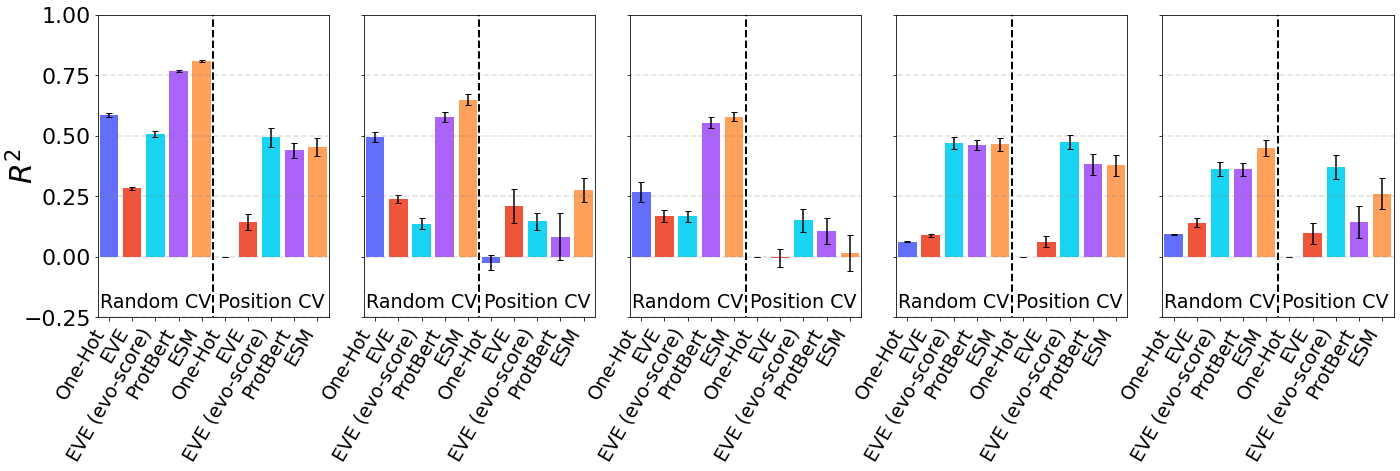

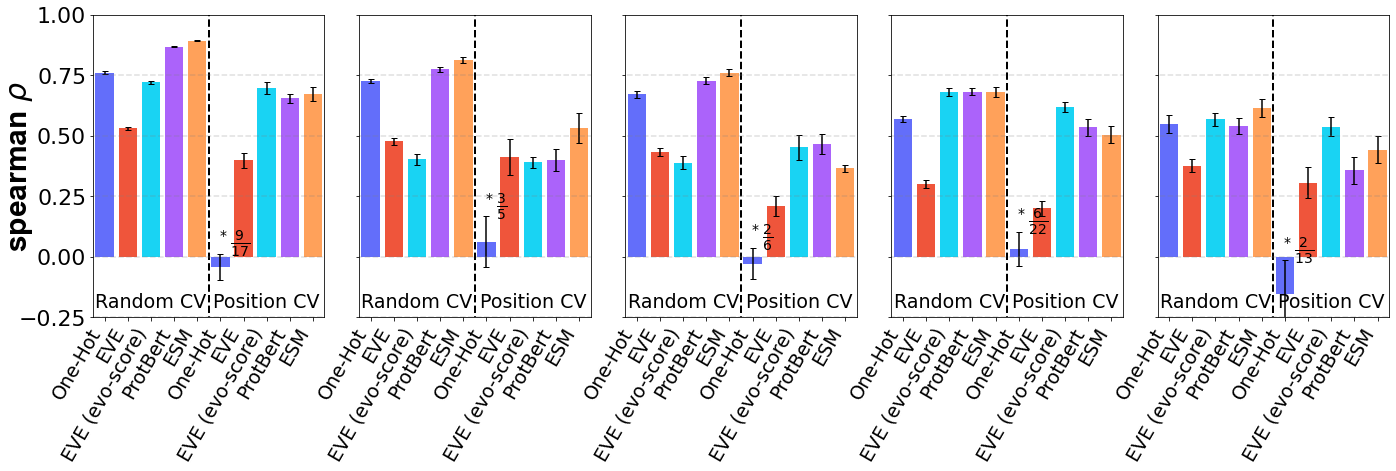

Regressor: GPmatern52 



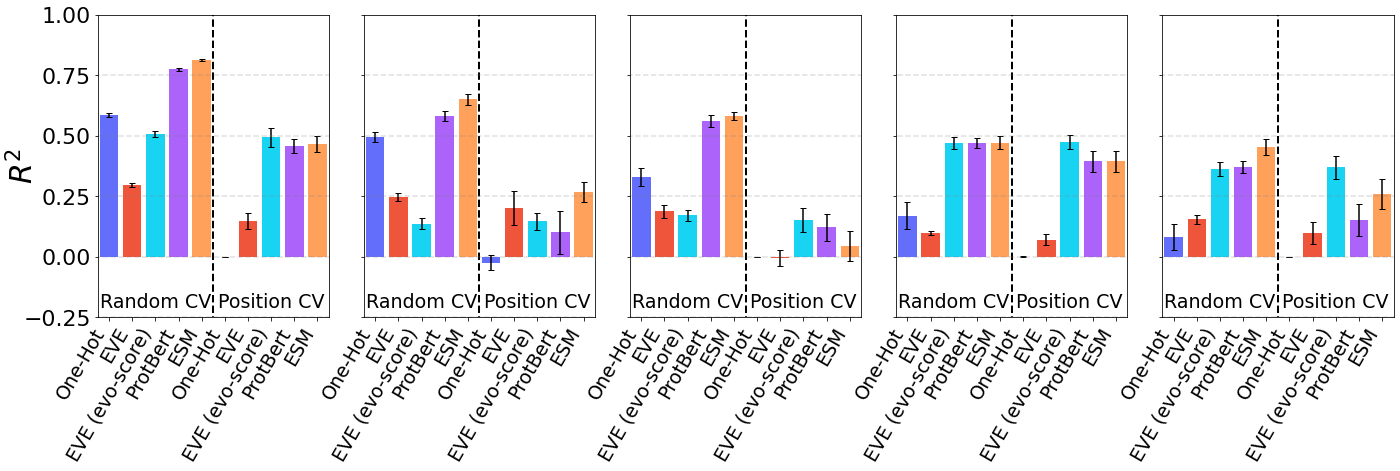

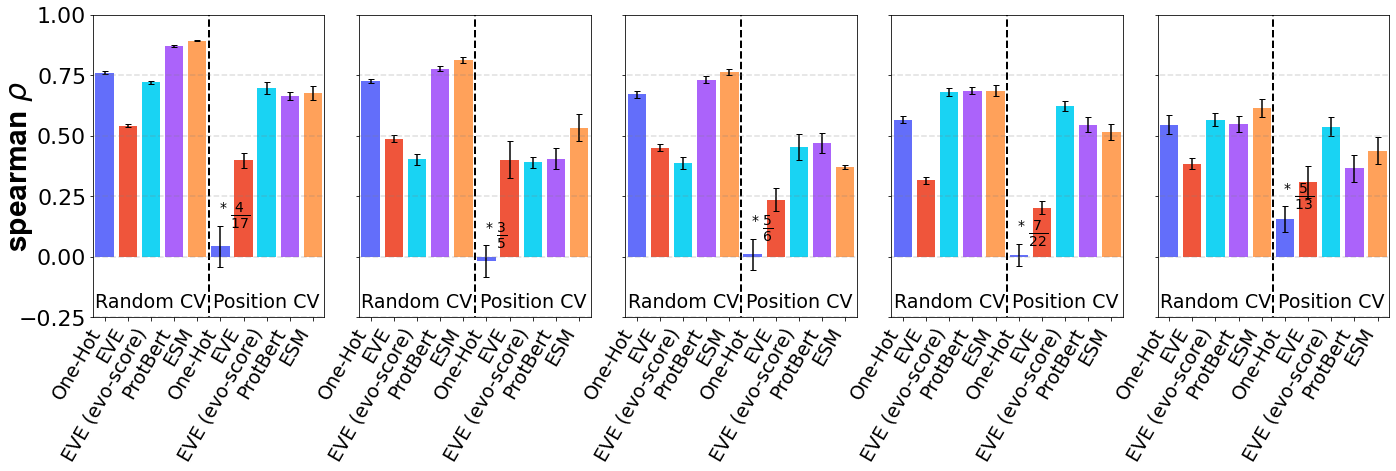

Regressor: RF 



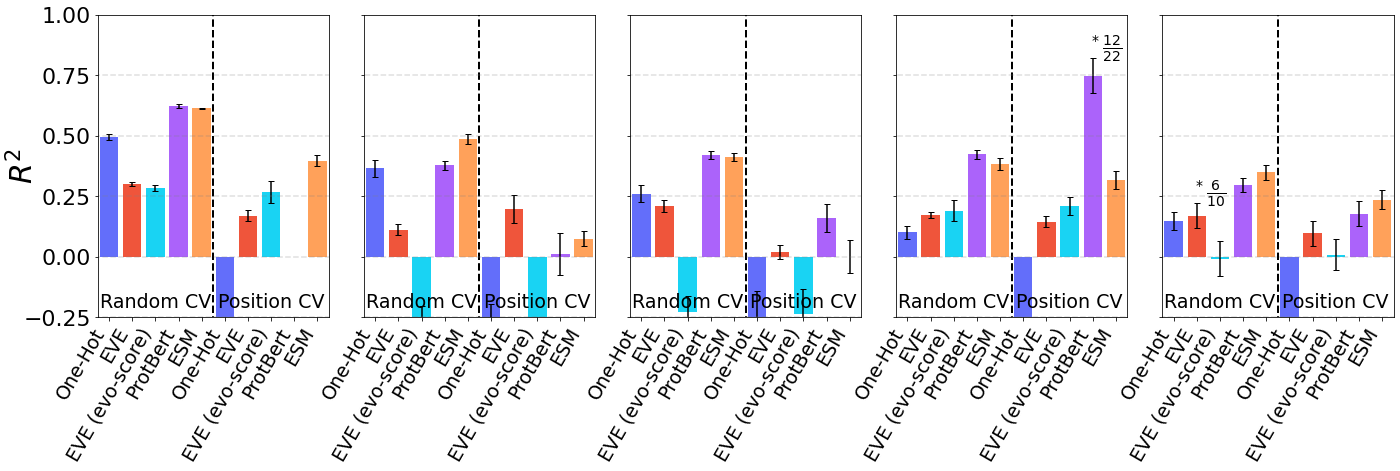

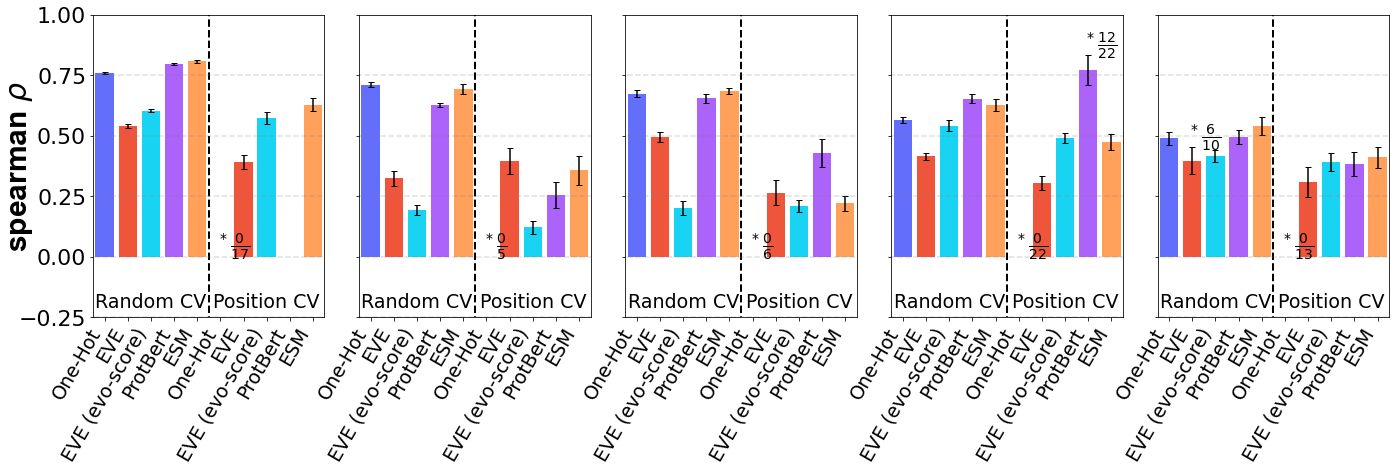

Regressor: KNN 



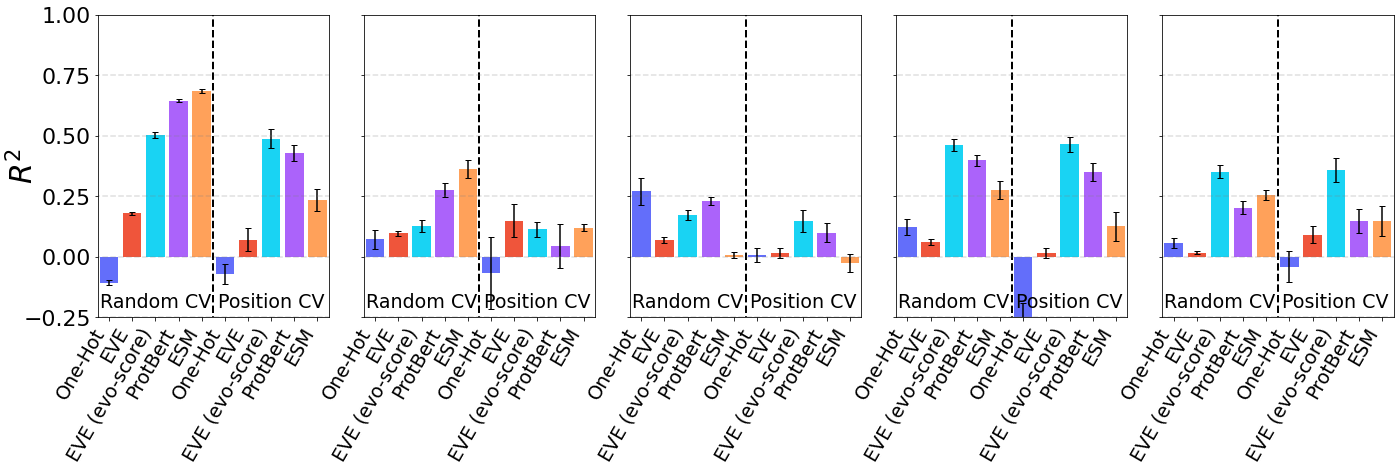

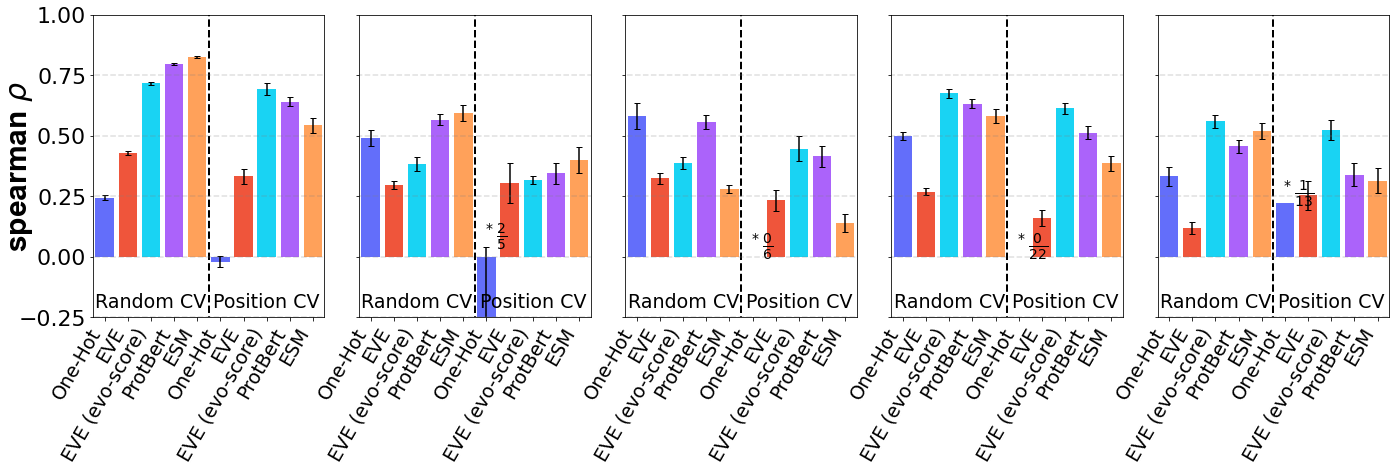

In [4]:
for algo in ALGORITHMS:
    # Compare Embeddings across all algorithms
    print(f"Regressor: {algo} \n")
    plot_metric_comparison_bar(datasets=DATASETS,
                            reps=REPRESENTATIONS,
                            metrics=METRICS,
                            train_test_splitter=PROTOCOLS,
                            algos=[algo],
                            color_by="rep",
                            x_axis="rep",
                            cached_results=True,
                            savefig=False)

Embedding: transformer


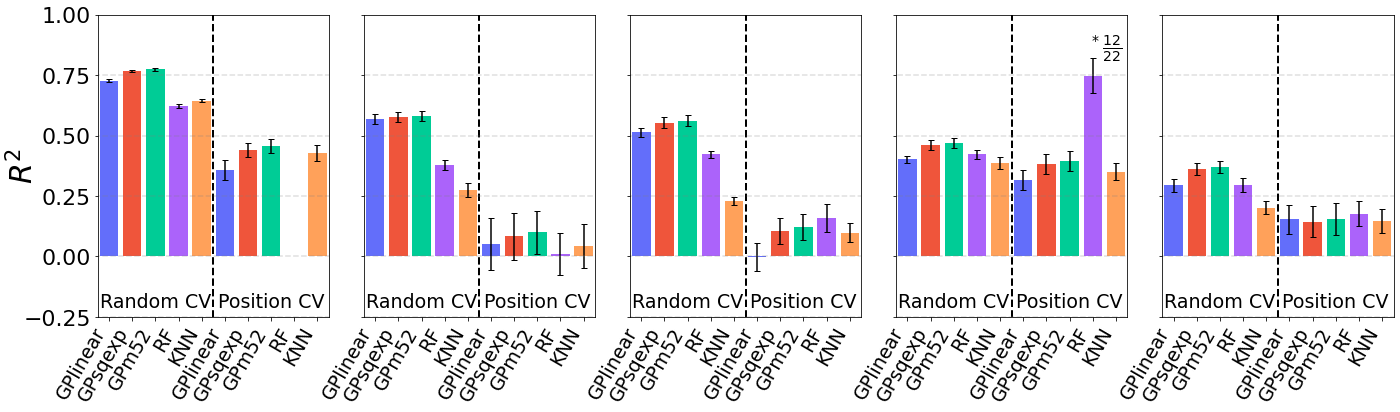

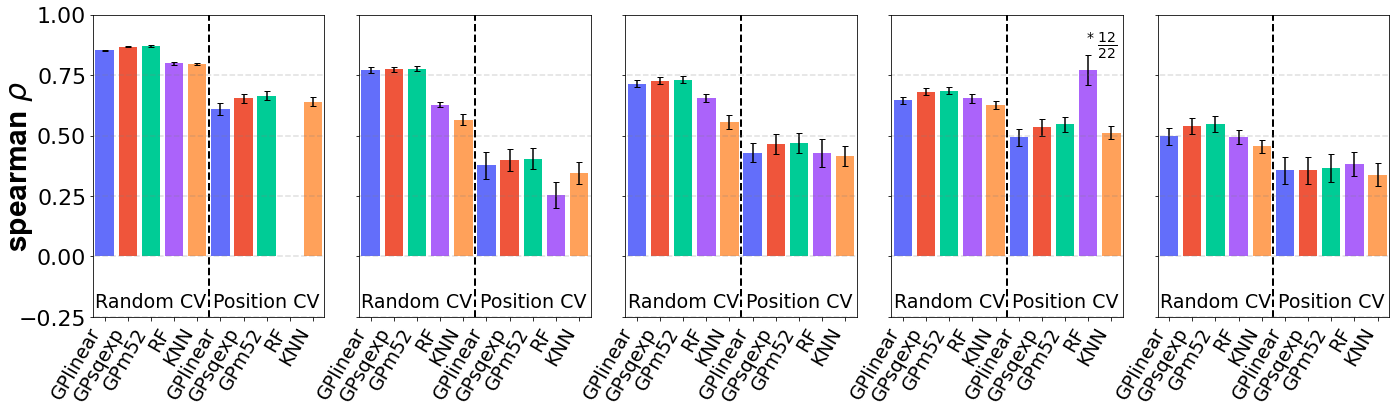

Embedding: one_hot


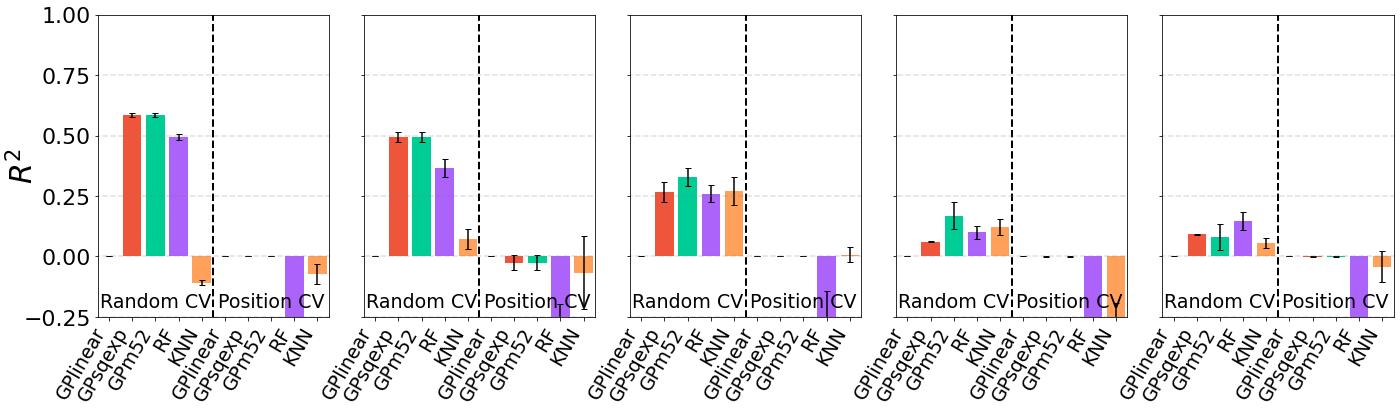

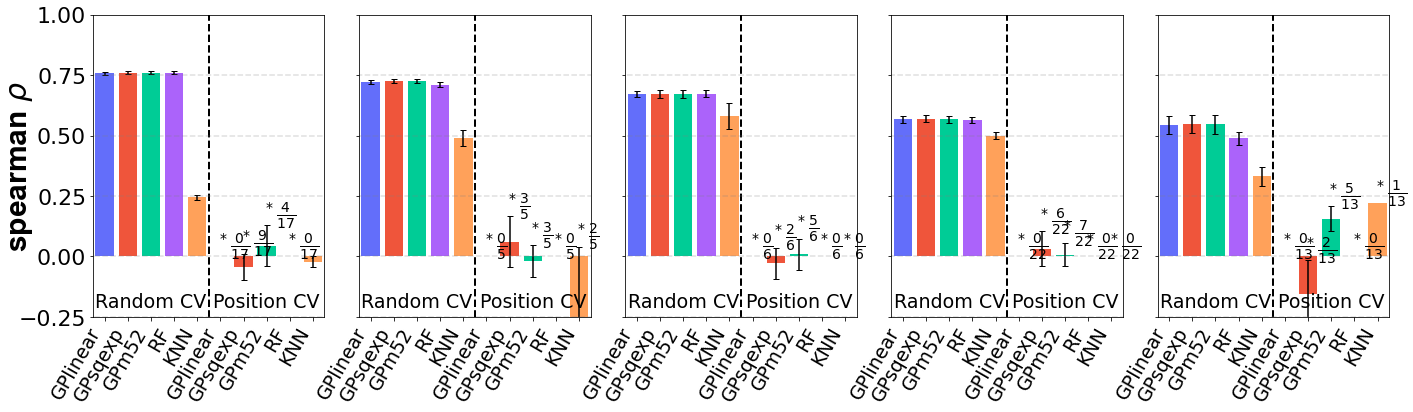

Embedding: eve


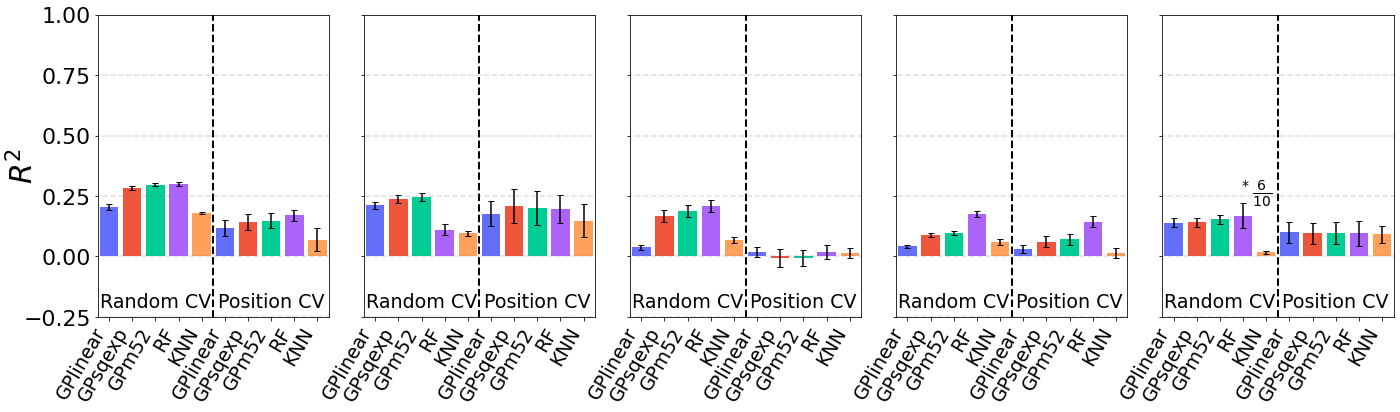

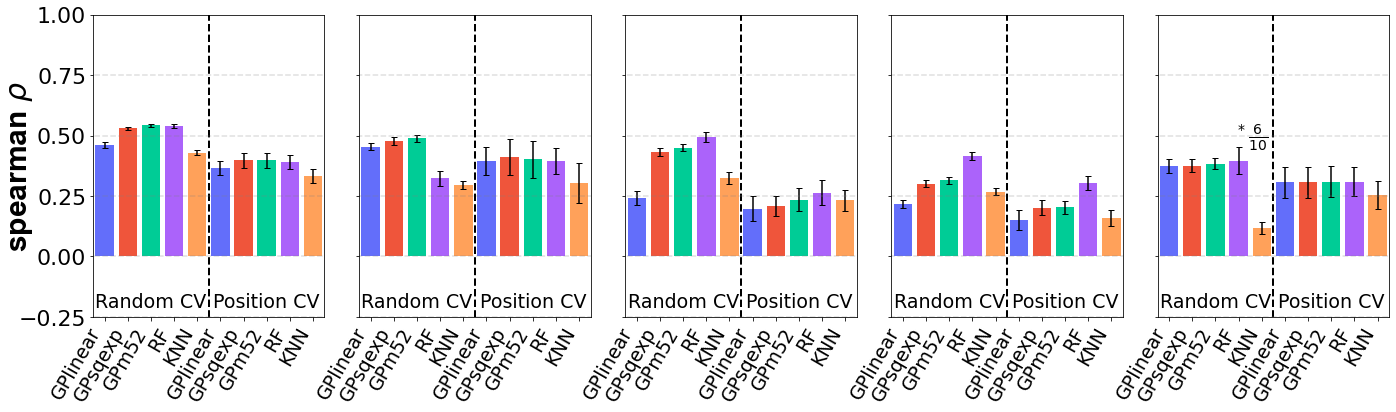

In [5]:
for embedding in [TRANSFORMER, ONE_HOT, EVE]:
    print(f"Embedding: {embedding}")
    plot_metric_comparison_bar(datasets=["1FQG",  "UBQT", "TIMB", "MTH3", "BRCA"],
                        reps=[embedding], 
                        metrics=METRICS,
                        train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")],
                        algos=ALGORITHMS,
                        color_by="algo",
                        x_axis="algo",
                        cached_results=True,
                        savefig=False)

### Calibration and Confidence

Dataset: UBQT



/Users/rcml/protein_regression/notebooks/../visualization/plot_metric_for_uncertainties.py:234: RuntimeWarning: invalid value encountered in sqrt
  uncertainties = np.sqrt(metric_values[dataset_key][algo][rep][aug][s]['unc'])


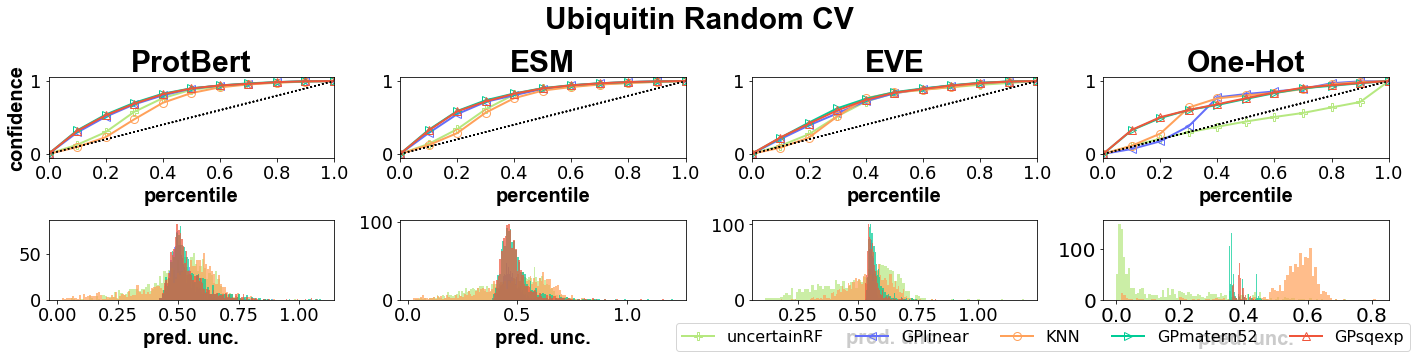

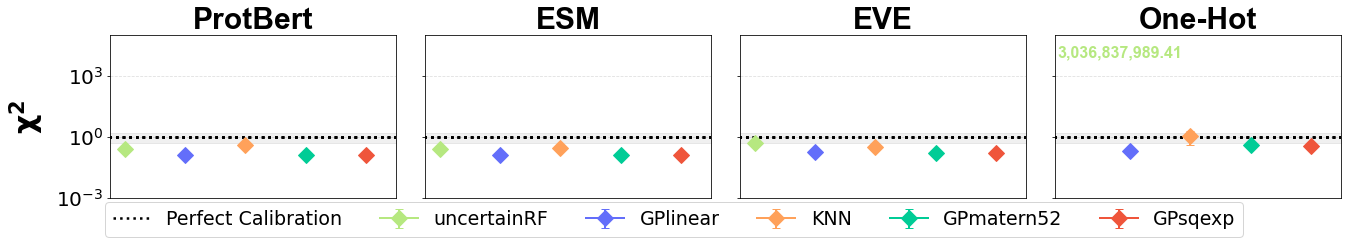

Dataset: TIMB



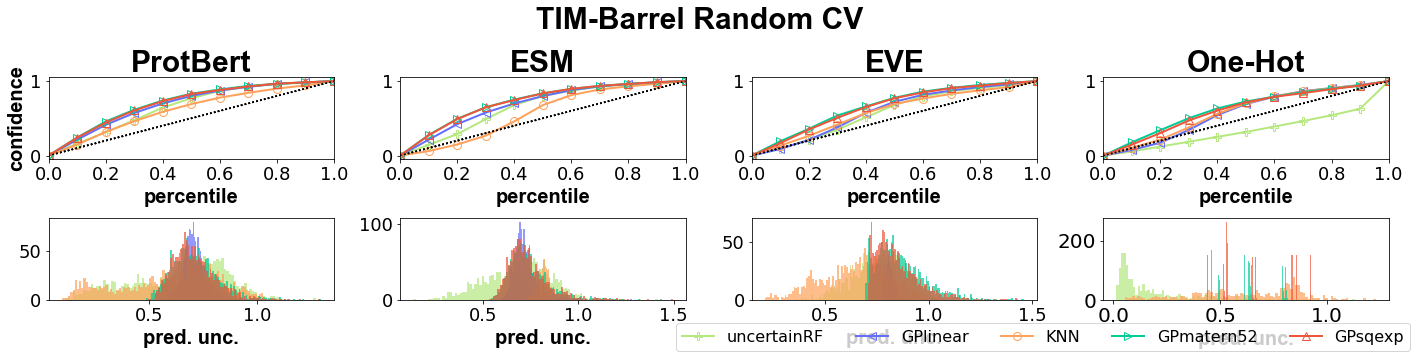

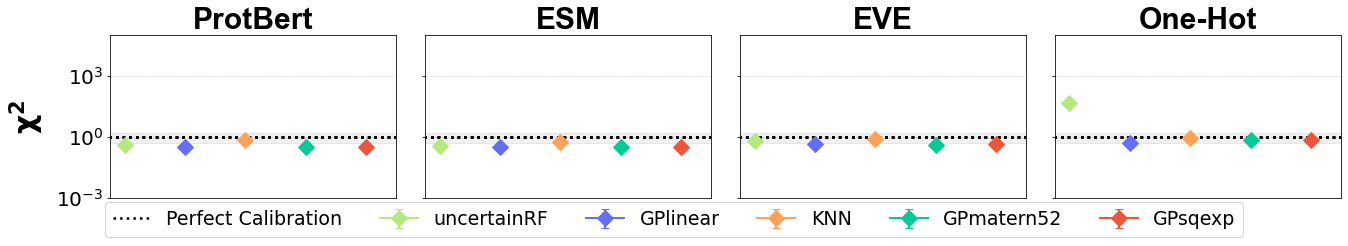

Dataset: MTH3



/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


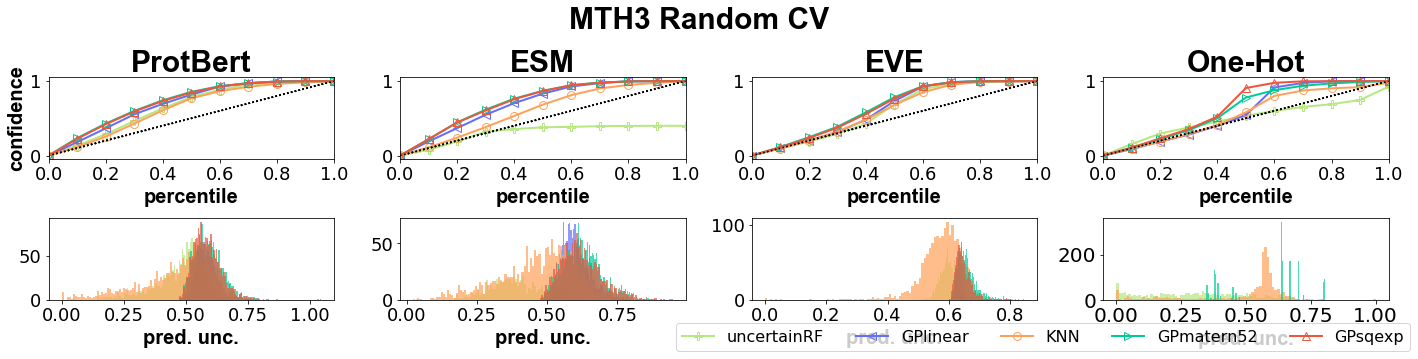

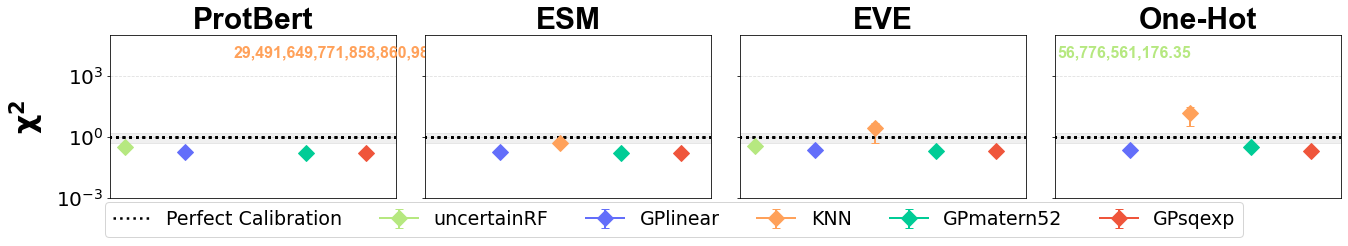

Dataset: BRCA



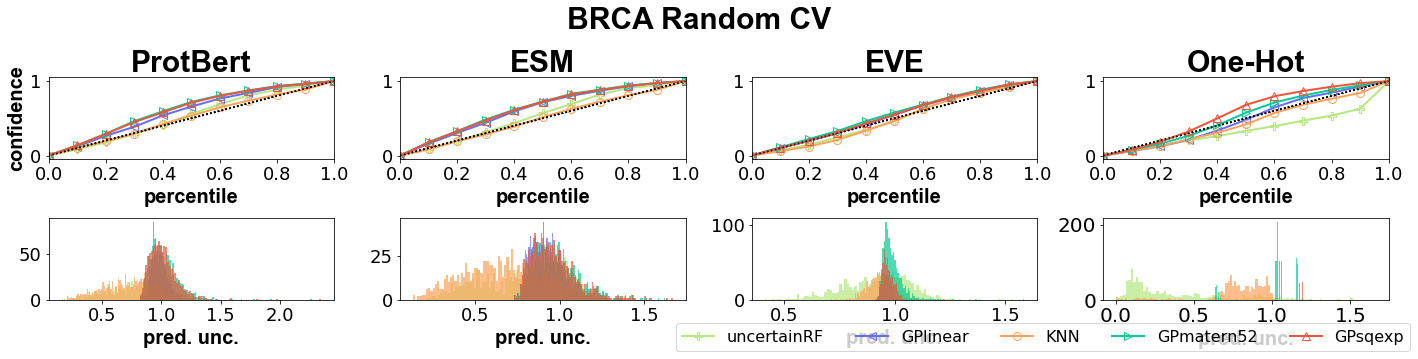

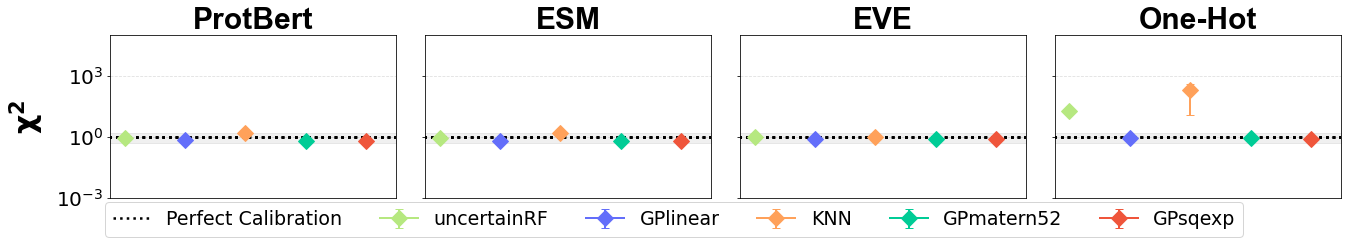

Dataset: UBQT



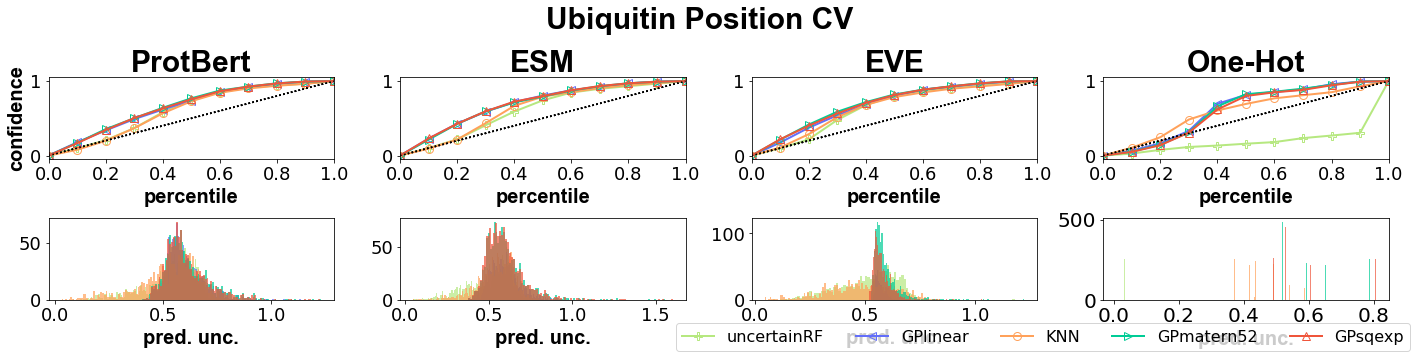

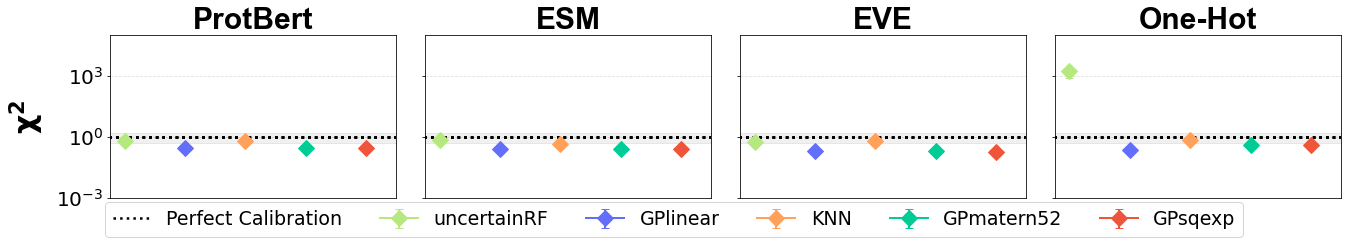

Dataset: TIMB



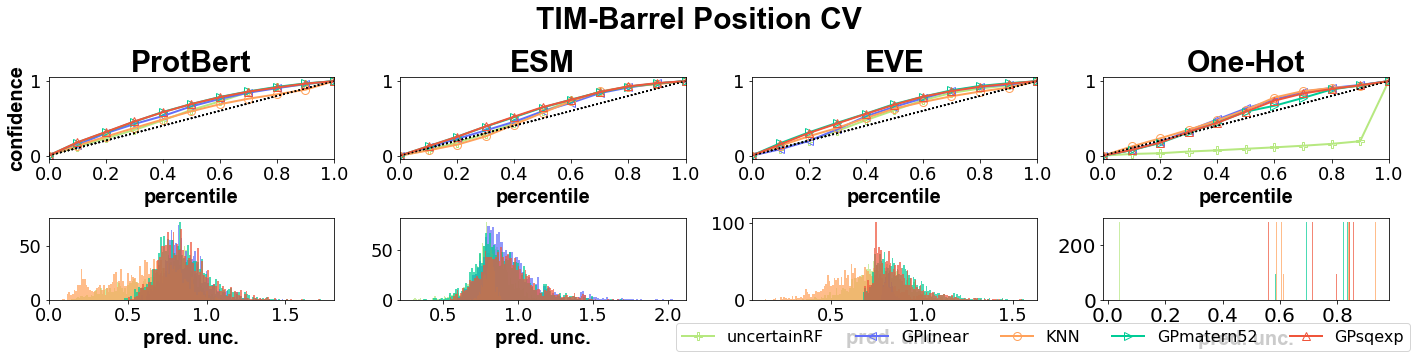

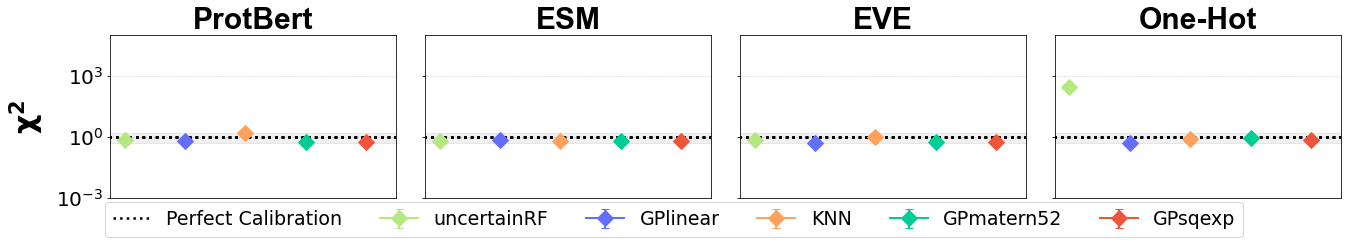

Dataset: MTH3



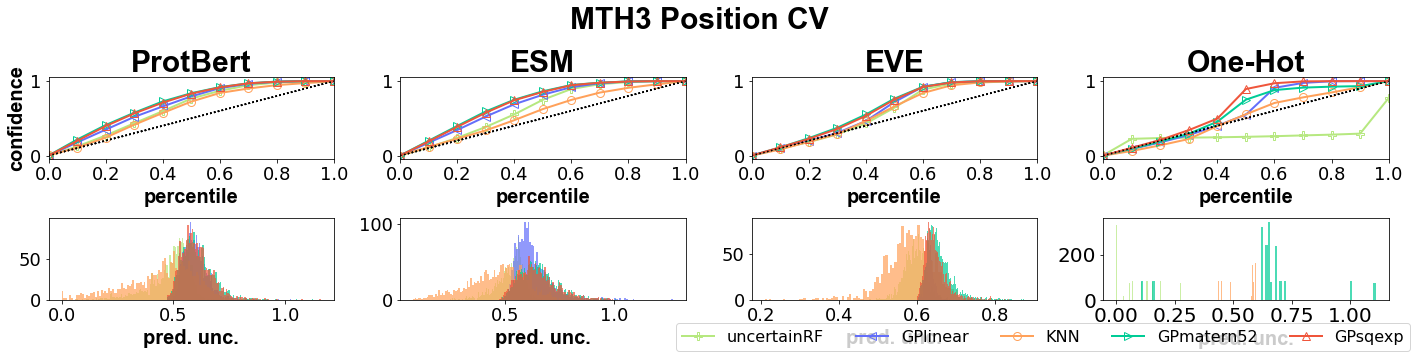

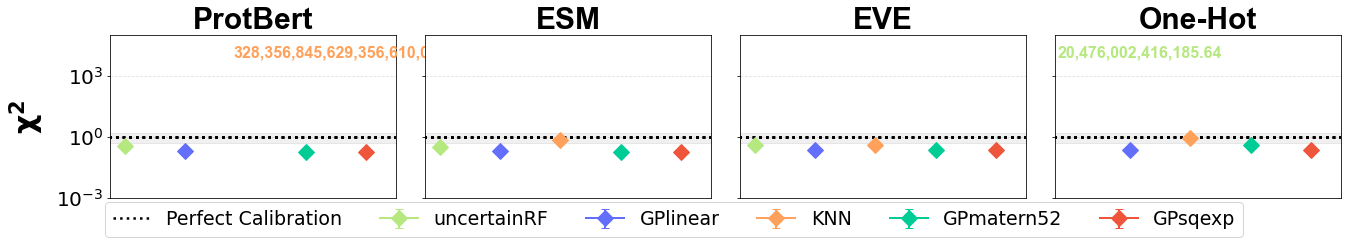

Dataset: BRCA



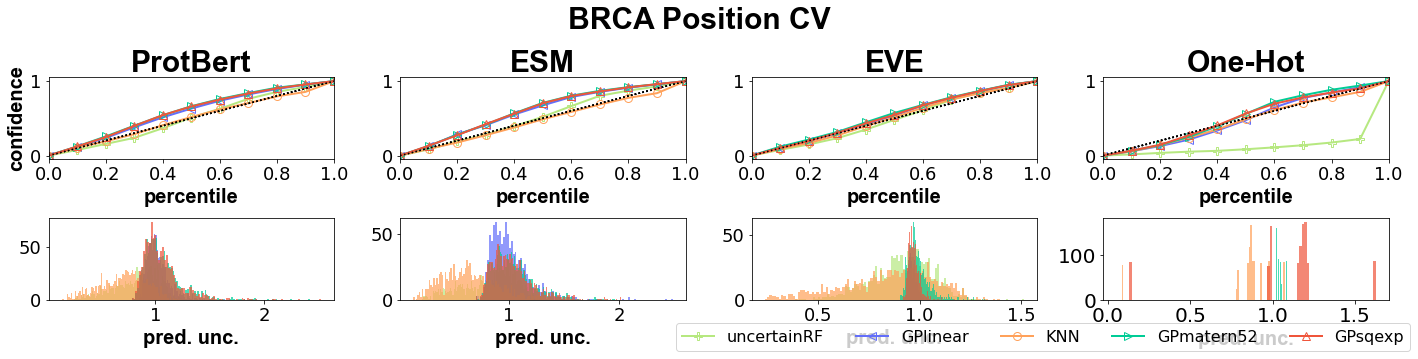

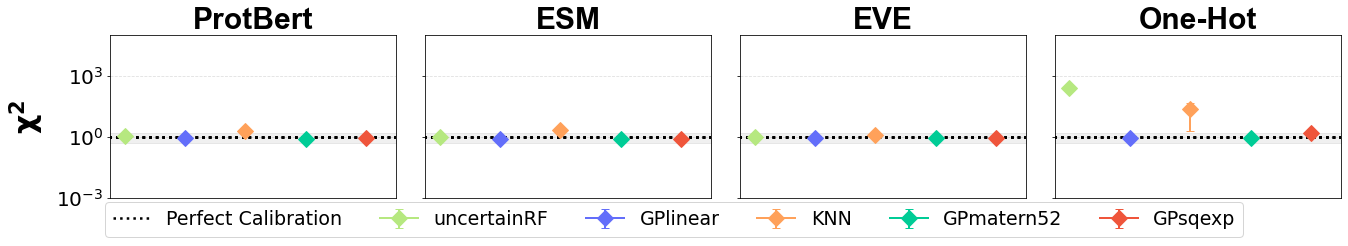

In [6]:
# add confidence curves to calibration plotting
for dataset in ["UBQT", "TIMB", "MTH3", "BRCA"]:
    print(f"Dataset: {dataset}\n")
    plot_uncertainty_eval(datasets=[dataset], 
                reps=[TRANSFORMER, ESM, EVE, ONE_HOT],
                algos=[UncertainRandomForest().get_name(), 
                GPonRealSpace().get_name(),
                KNN().get_name(),
                GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(), 
                GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(),], 
                train_test_splitter=RandomSplitter("1FQG"),
                augmentations = [NO_AUGMENT], 
                number_quantiles=10, 
                optimize=True,
                d=None, 
                dim_reduction=None, 
                cached_results=True,
                savefig=False)
# MAKE UNCERTAIN PLOTS POSITIONSPLITTER
for dataset in ["UBQT", "TIMB", "MTH3", "BRCA"]:
    print(f"Dataset: {dataset}\n")
    plot_uncertainty_eval(datasets=[dataset], 
                reps=[TRANSFORMER, ESM, EVE, ONE_HOT],
                algos=[UncertainRandomForest().get_name(), 
                GPonRealSpace().get_name(),
                KNN().get_name(),
                GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(), 
                GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(),], 
                train_test_splitter=PositionSplitter("1FQG"), 
                augmentations = [NO_AUGMENT], 
                number_quantiles=10, 
                optimize=True, 
                d=None, 
                dim_reduction=None,
                cached_results=True,
                savefig=False)

### Mutationsplitting
Accounting for Regressors: GPMatern52 and KNN.:

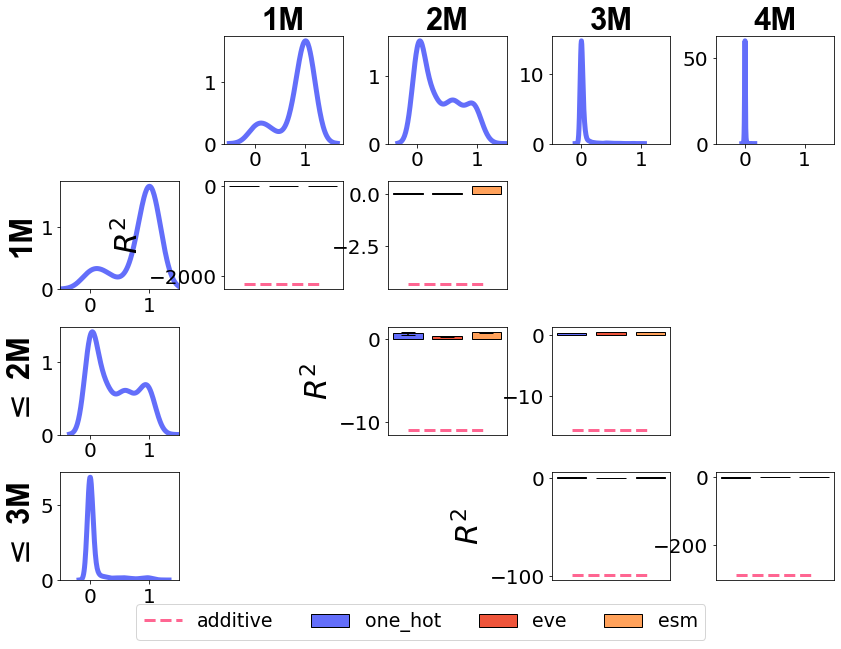

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


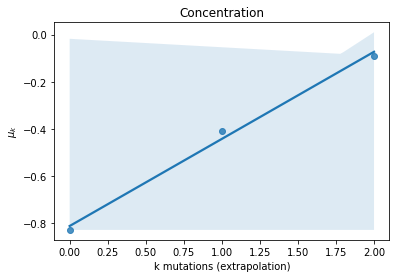

In [7]:
plot_mutation_comparison_matrix(datasets=["TOXI"], 
                    algos=[GPonRealSpace(kernel_factory= lambda: Matern52()).get_name()], 
                    metrics=[MSE], 
                    reps=[ONE_HOT, EVE, ESM],
                    train_test_splitter=[BioSplitter("TOXI", 1, 1), BioSplitter("TOXI", 1, 2), BioSplitter("TOXI", 2, 2), BioSplitter("TOXI", 2, 3), BioSplitter("TOXI", 3, 3), BioSplitter("TOXI", 3, 4)],
                    dimension=None, 
                    dim_reduction=None,
                    cached_results=True,
                    savefig=False)

### Optimization - no-optimization $\Delta$

Representation: esm


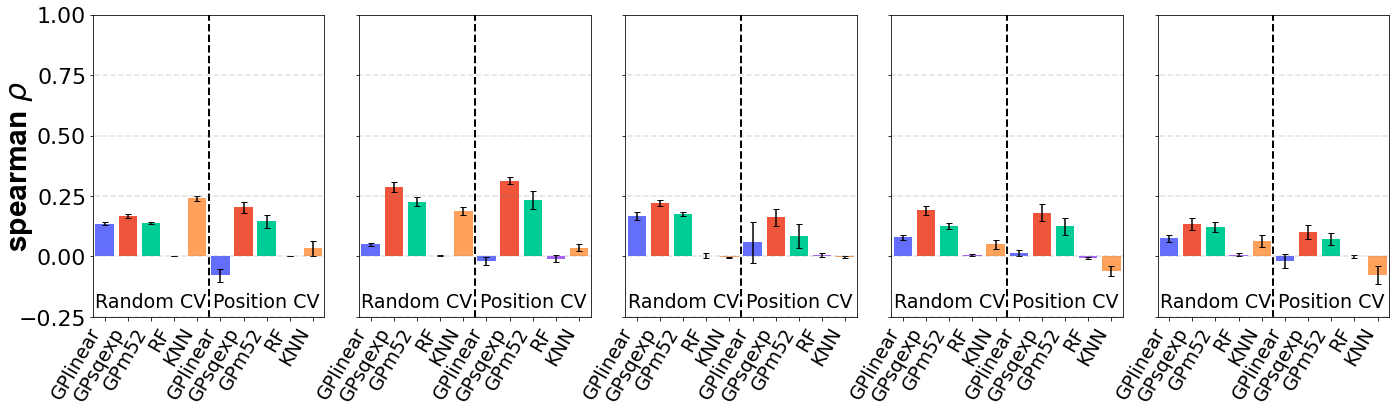

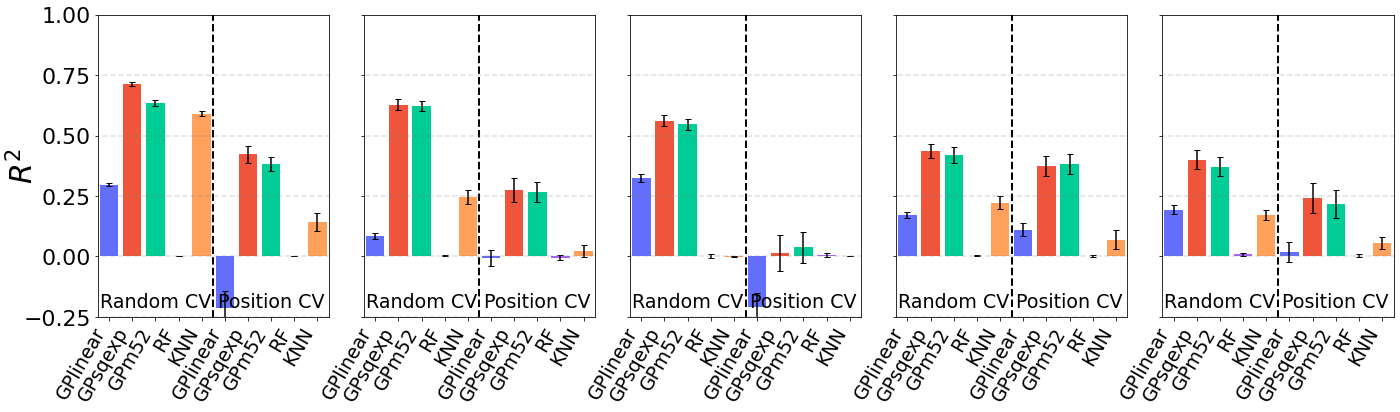

Representation: one_hot


/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


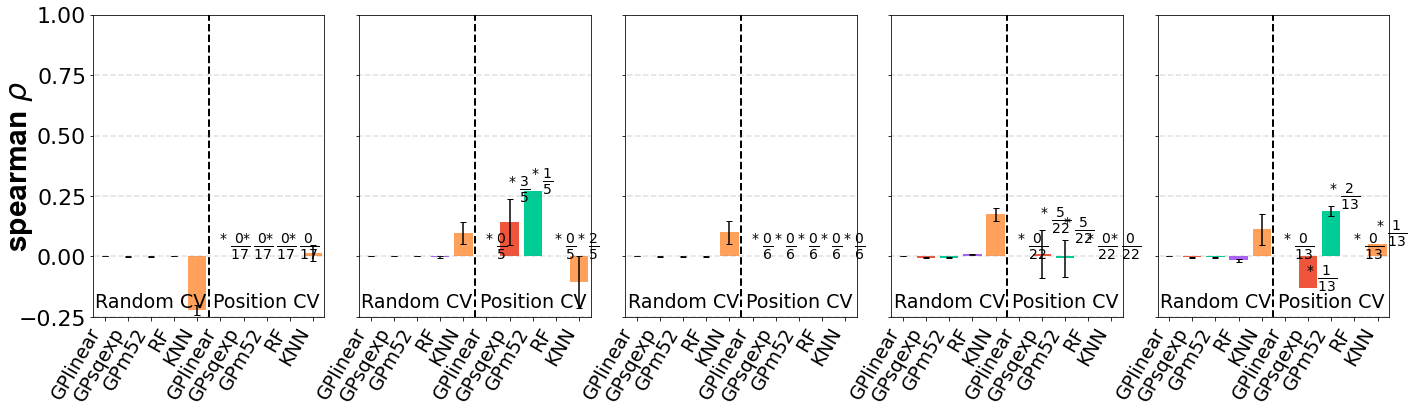

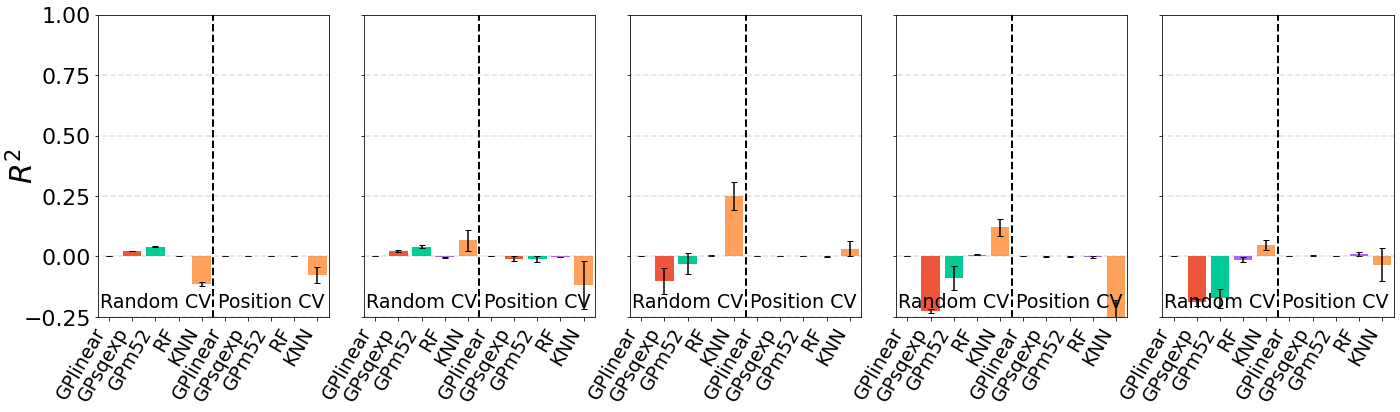

Representation: eve


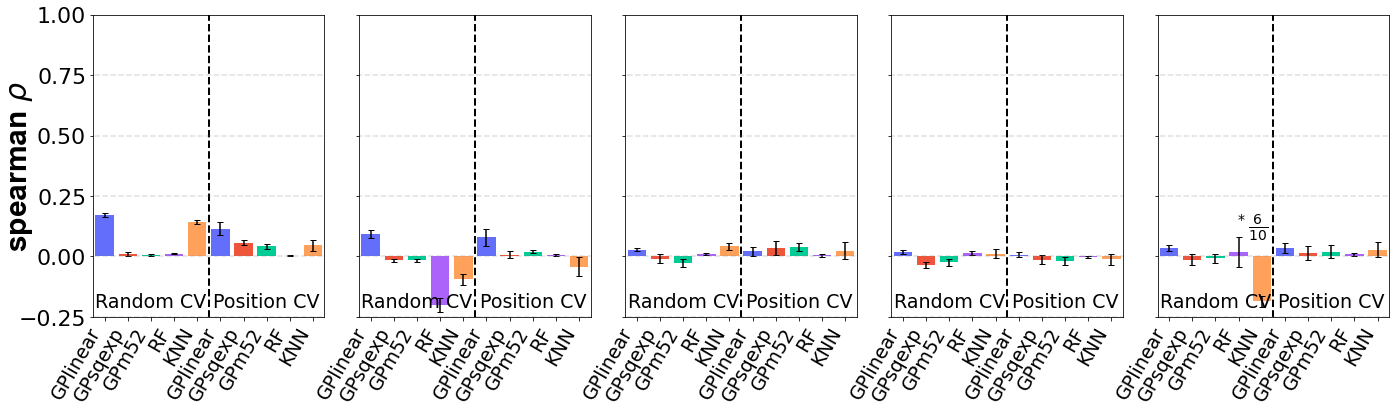

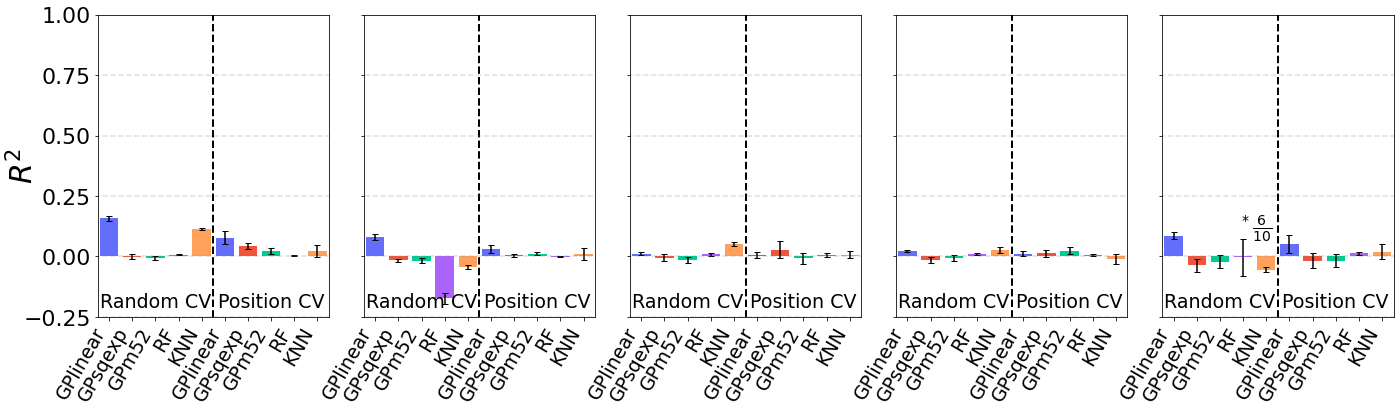

In [8]:
for rep in [ESM, ONE_HOT, EVE]:
    print(f"Representation: {rep}")
    plot_metric_comparison_bar_param_delta(datasets=["1FQG", "UBQT", "TIMB", "MTH3", "BRCA"], # ,  "UBQT", "TIMB", "MTH3", "BRCA"
                        reps=[rep], 
                        metrics=METRICS,
                        train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")], #
                        algos=ALGORITHMS,
                        color_by="algo",
                        x_axis="algo",
                        cached_results=True,
                        savefig=False)

### Lower Dimensions

Dimension: 1000


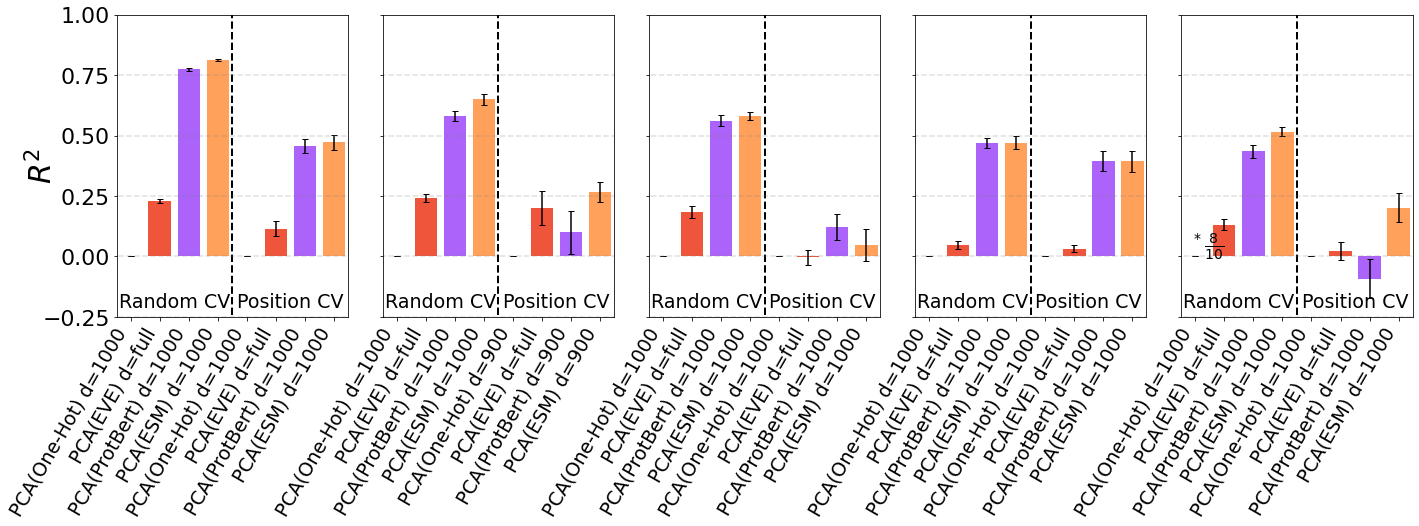

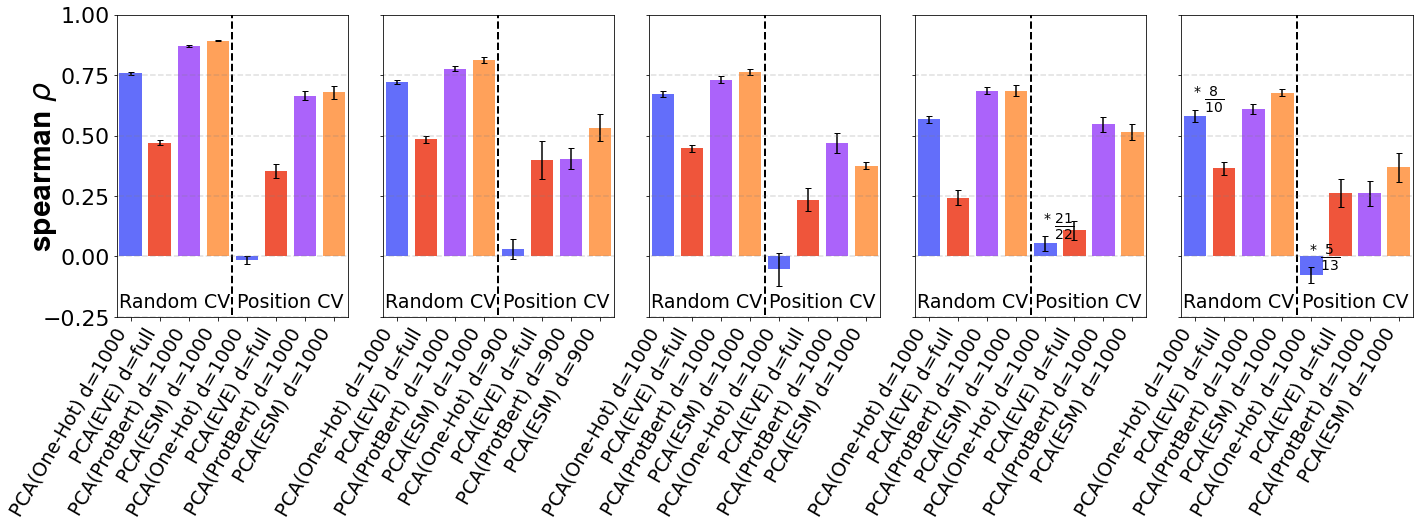

Dimension: 100


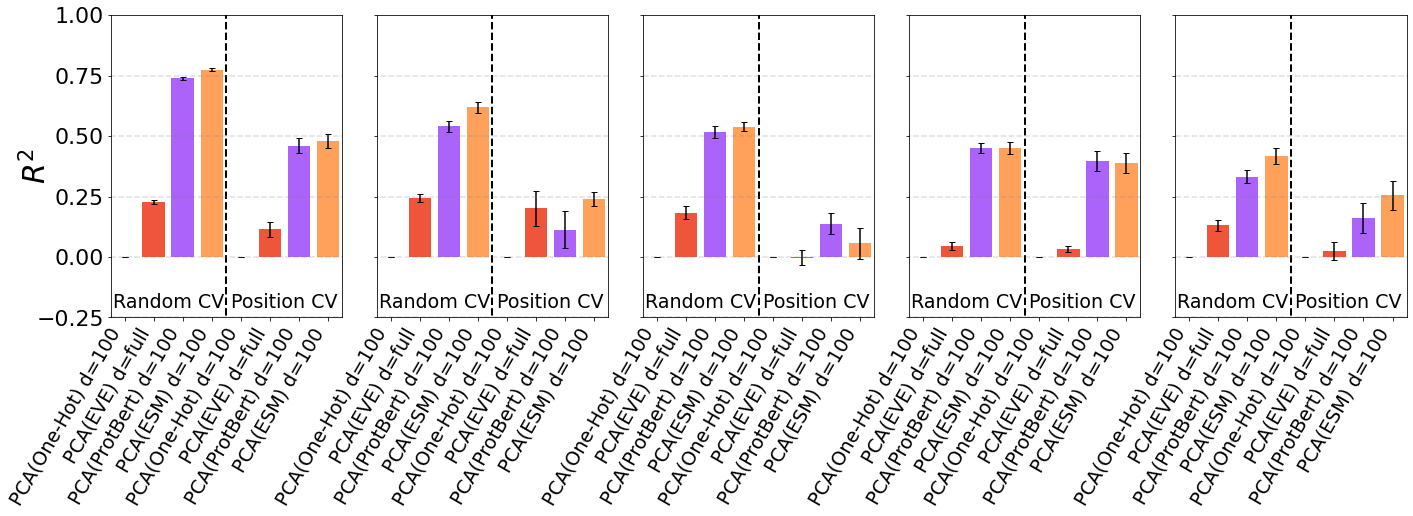

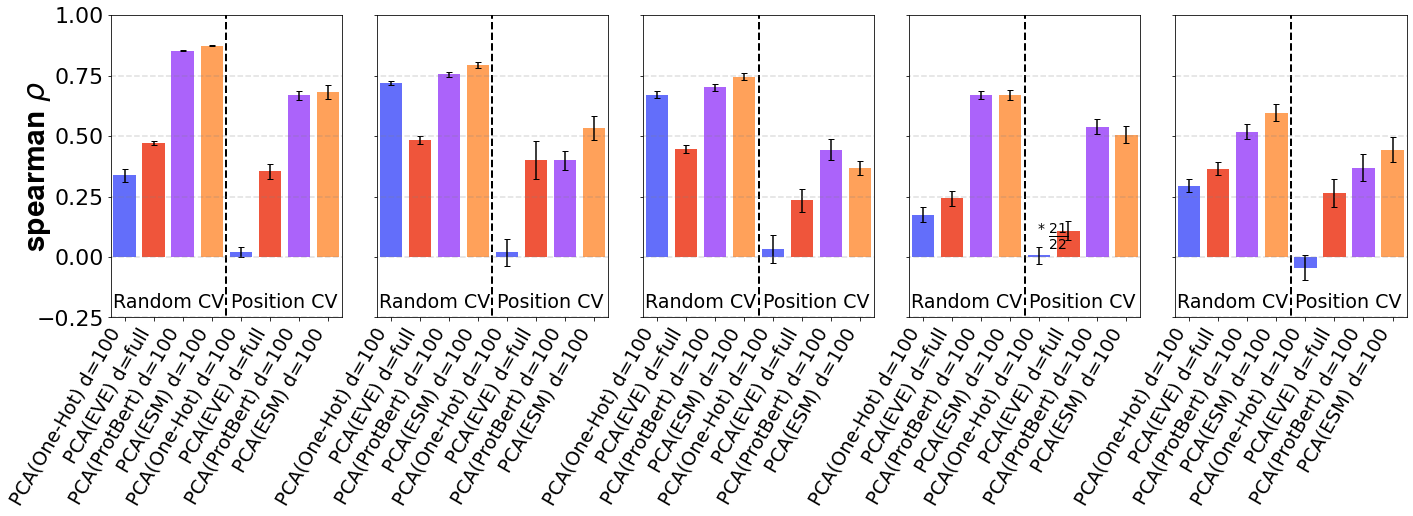

Dimension: 10


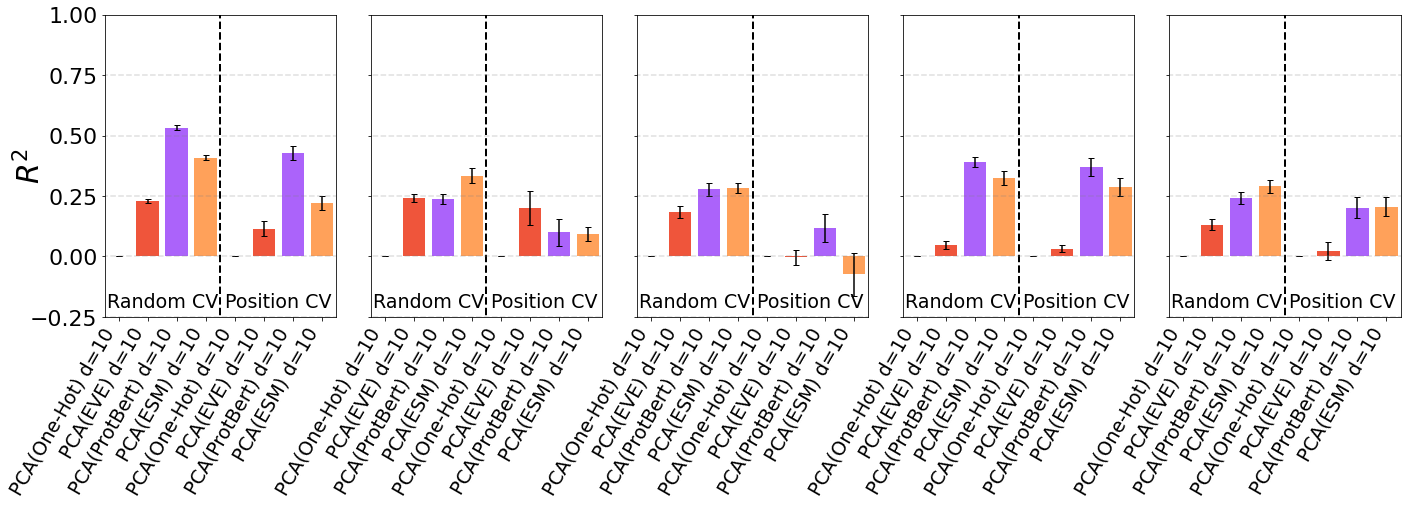

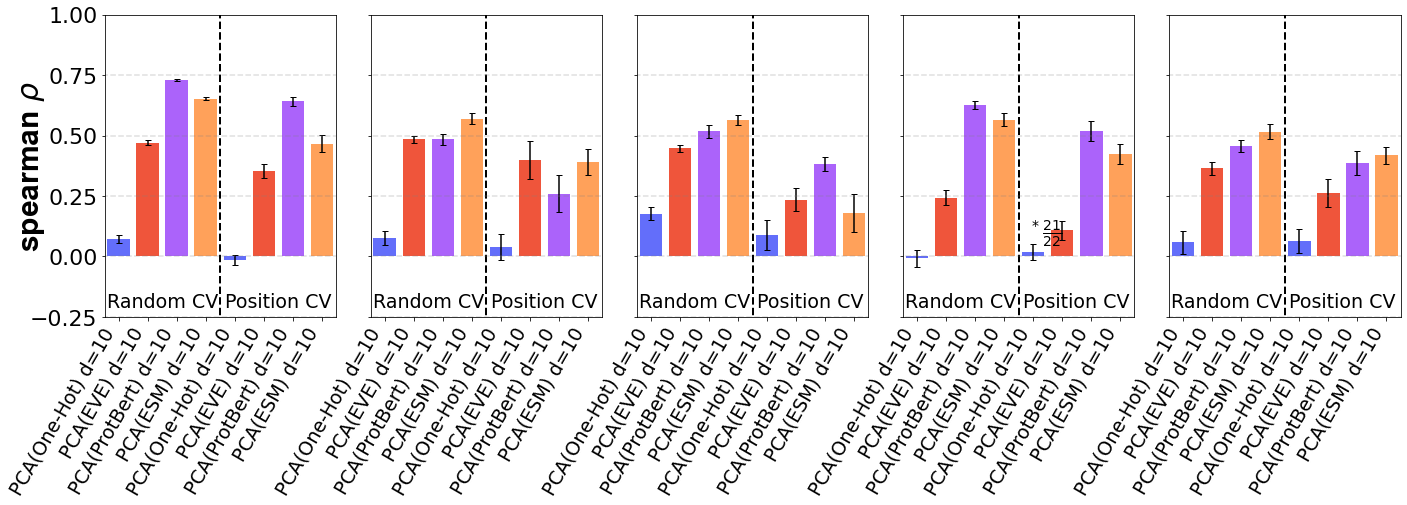

In [9]:
print("Dimension: 1000")
plot_metric_comparison_bar(datasets=["1FQG",  "UBQT", "TIMB", "MTH3", "BRCA"], 
                          reps=[ONE_HOT, EVE, TRANSFORMER, ESM],
                          metrics=METRICS,
                          train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")],
                          algos=[GPonRealSpace(kernel_factory=lambda: Matern52()).get_name()],
                          color_by="rep",
                          x_axis="rep",
                          dim=1000,
                          dim_reduction=LINEAR,
                          cached_results=True,
                          savefig=False)
print("Dimension: 100")
plot_metric_comparison_bar(datasets=["1FQG",  "UBQT", "TIMB", "MTH3", "BRCA"], 
                          reps=[ONE_HOT, EVE, TRANSFORMER, ESM],
                          metrics=METRICS,
                          train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")],
                          algos=[GPonRealSpace(kernel_factory=lambda: Matern52()).get_name()],
                          color_by="rep",
                          x_axis="rep",
                          dim=100,
                          dim_reduction=LINEAR,
                          cached_results=True,
                          savefig=False)
print("Dimension: 10")
plot_metric_comparison_bar(datasets=["1FQG",  "UBQT", "TIMB", "MTH3", "BRCA"], 
                          reps=[ONE_HOT, EVE, TRANSFORMER, ESM],
                          metrics=METRICS,
                          train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")],
                          algos=[GPonRealSpace(kernel_factory=lambda: Matern52()).get_name()],
                          color_by="rep",
                          x_axis="rep",
                          dim=10,
                          dim_reduction=LINEAR,
                          cached_results=True,
                          savefig=False)

### ParE-ParD Calibration

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/Users/rcml/protein_regression/notebooks/../uncertainty_quantification/calibration.py:27: RuntimeWarning: invalid value encountered in double_scalars
  Sharpness = np.std(uncertainties, ddof=1)/np.mean(uncertainties)


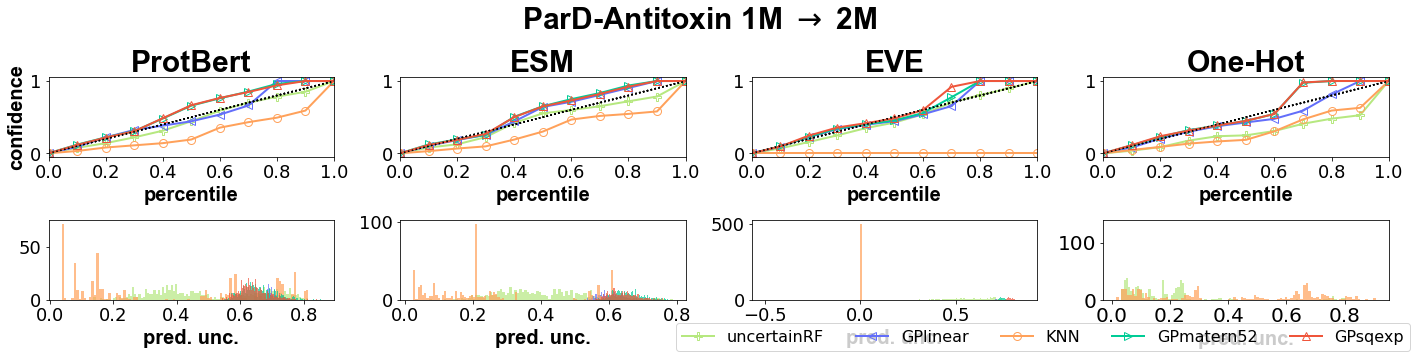

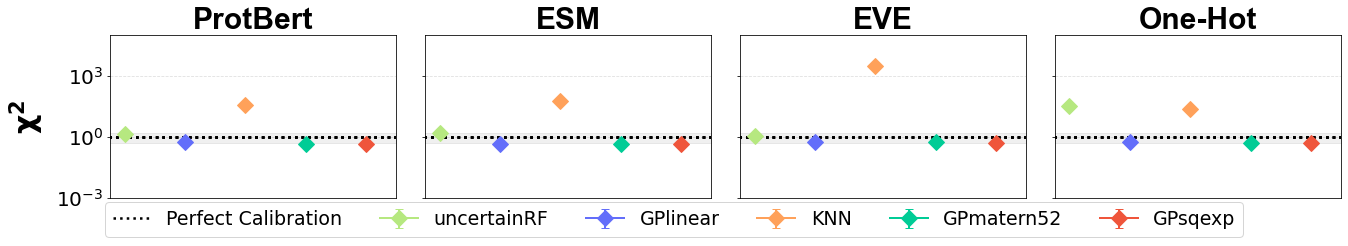

Missing values for KNN at esm.
Missing values for KNN at eve.


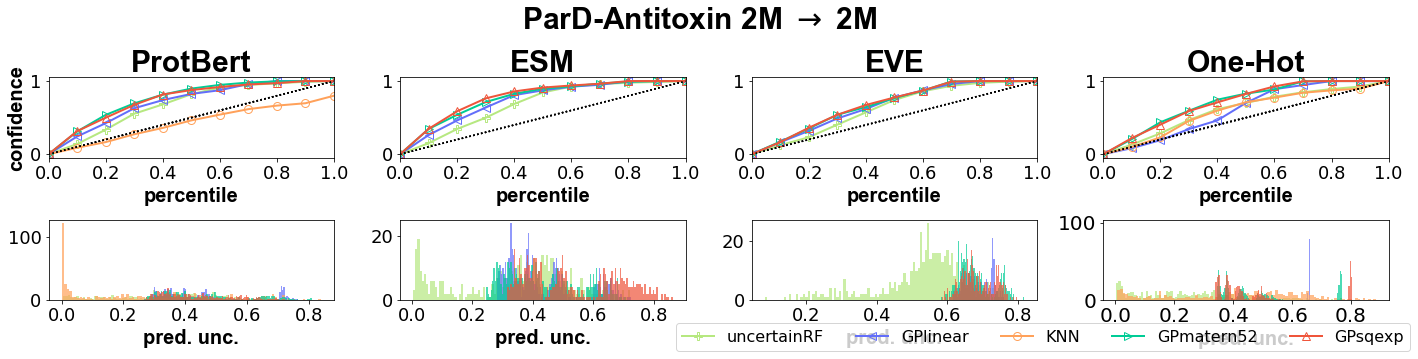

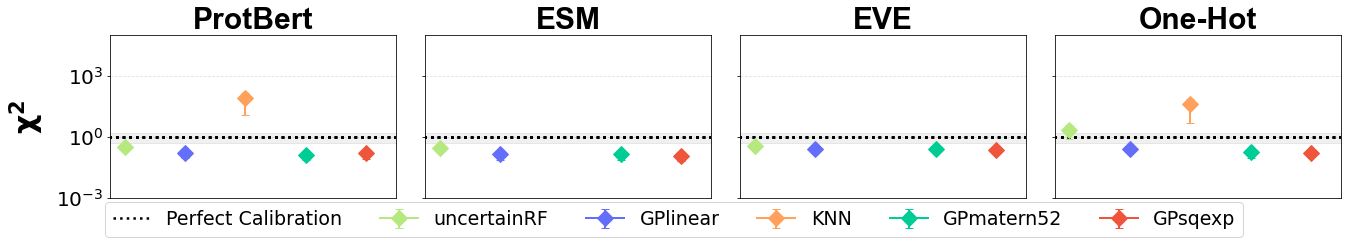

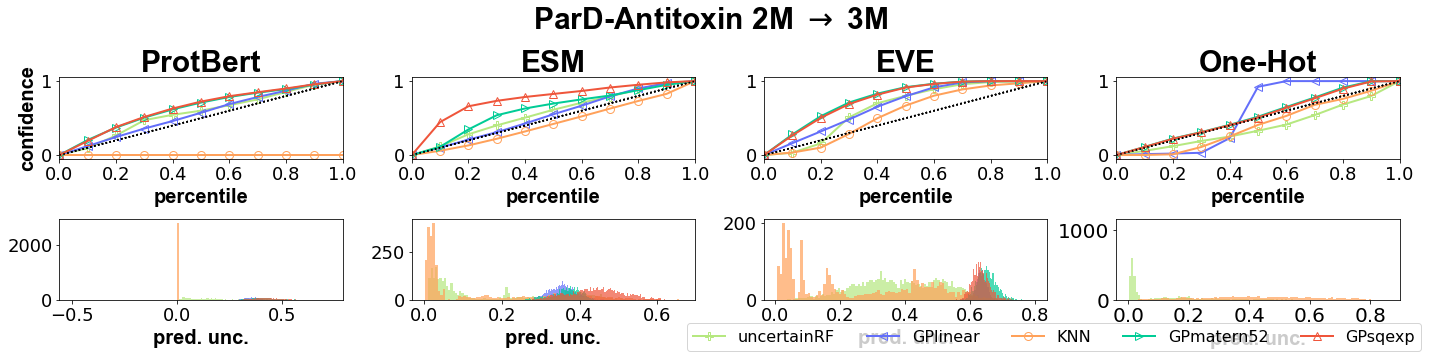

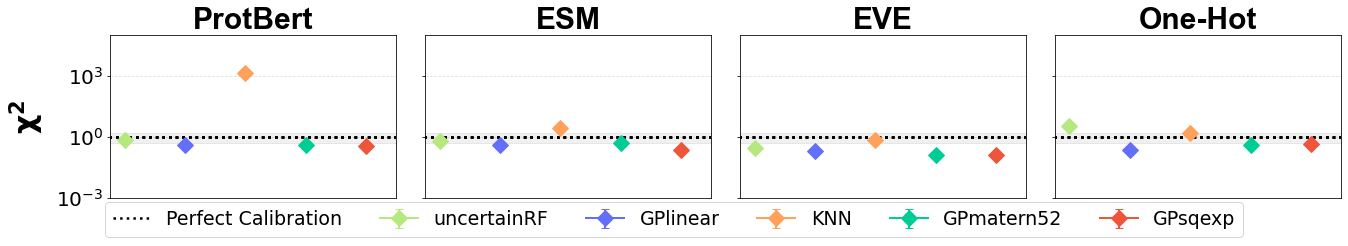

Missing values for KNN at eve.
Missing values for KNN at one_hot.


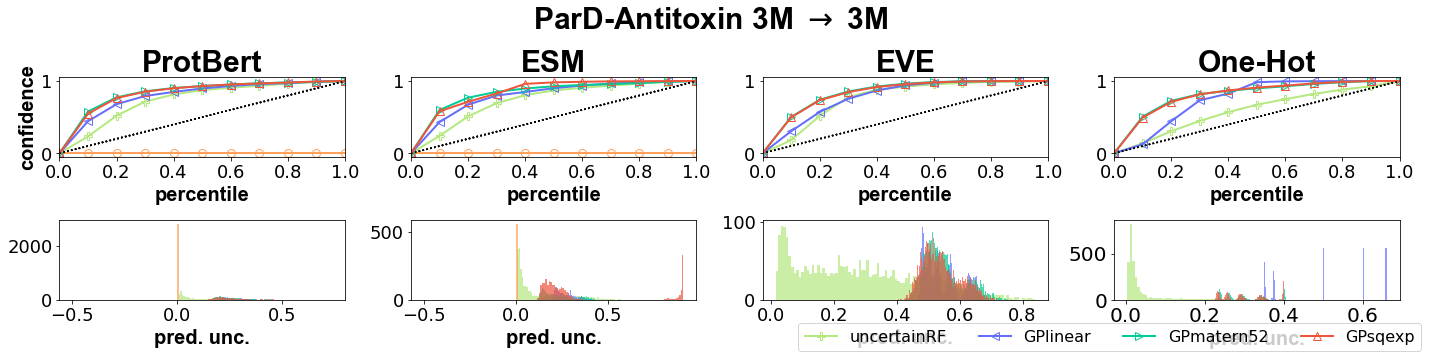

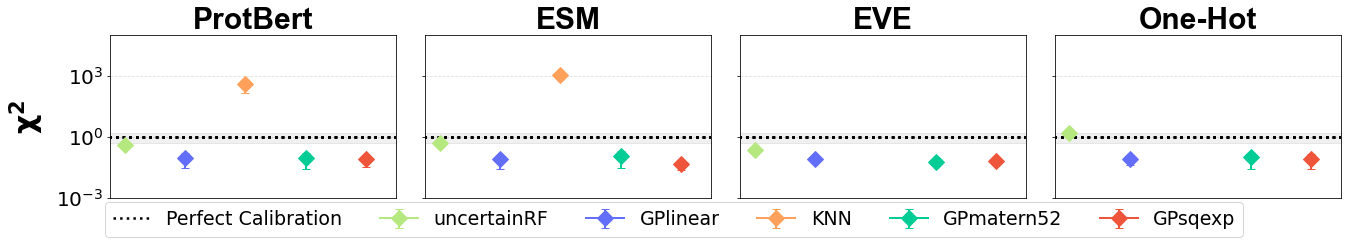

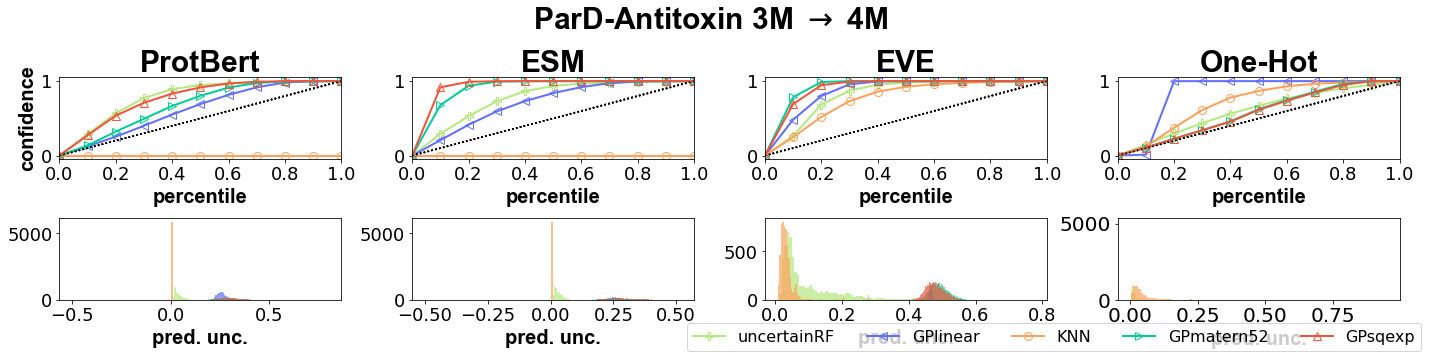

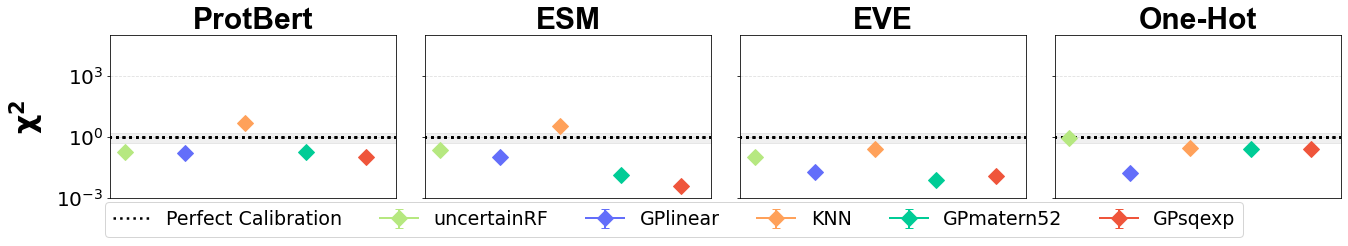

In [10]:
metric = MSE
reps = [TRANSFORMER, ESM, EVE, ONE_HOT]
augmentations =  [NO_AUGMENT]
number_quantiles = 10
algos = [UncertainRandomForest().get_name(), 
        GPonRealSpace().get_name(),
        KNN().get_name(),
        GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(), 
        GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(),]
d = None # 2, 10, 100, 1000, None
dim_reduction = LINEAR # LINEAR # NON_LINEAR
cached_results = True

plot_uncertainty_eval(datasets=["TOXI"], reps=reps,
                          algos=algos, train_test_splitter=BioSplitter("TOXI", 1, 2),
                          augmentations = augmentations, number_quantiles=number_quantiles, optimize=True,
                          d=d, dim_reduction=None, cached_results=cached_results, savefig=False)
plot_uncertainty_eval(datasets=["TOXI"], reps=reps,
                        algos=algos, train_test_splitter=BioSplitter("TOXI", 2, 2),
                        augmentations = augmentations, number_quantiles=number_quantiles, optimize=True,
                        d=d, dim_reduction=None, cached_results=cached_results, savefig=False)
plot_uncertainty_eval(datasets=["TOXI"], reps=reps,
                        algos=algos, train_test_splitter=BioSplitter("TOXI", 2, 3),
                        augmentations = augmentations, number_quantiles=number_quantiles, optimize=True,
                        d=d, dim_reduction=None, cached_results=cached_results, savefig=False)
plot_uncertainty_eval(datasets=["TOXI"], reps=reps,
                        algos=algos, train_test_splitter=BioSplitter("TOXI", 3, 3),
                        augmentations = augmentations, number_quantiles=number_quantiles, optimize=True,
                        d=d, dim_reduction=None, cached_results=cached_results, savefig=False)
plot_uncertainty_eval(datasets=["TOXI"], reps=reps,
                        algos=algos, train_test_splitter=BioSplitter("TOXI", 3, 4),
                        augmentations = augmentations, number_quantiles=number_quantiles, optimize=True,
                        d=d, dim_reduction=None, cached_results=cached_results, savefig=False)

### Fractional Splitting

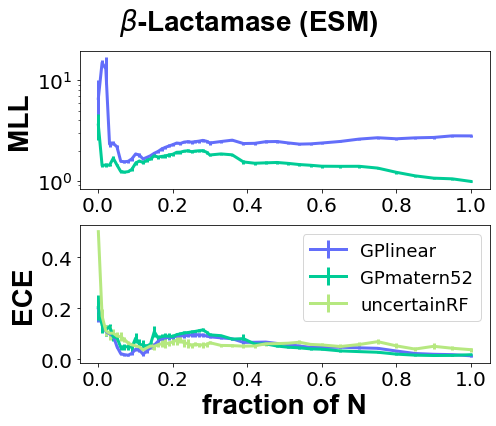

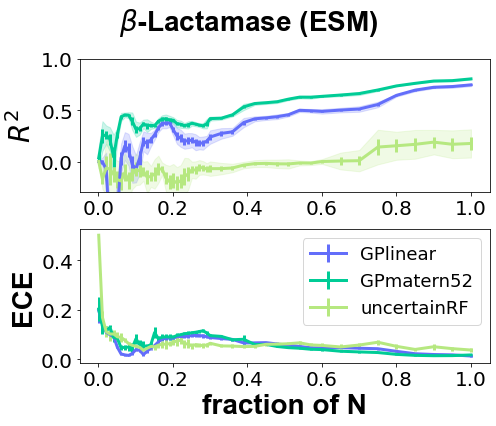

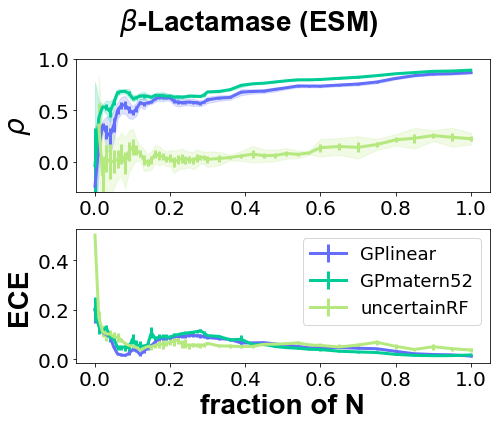

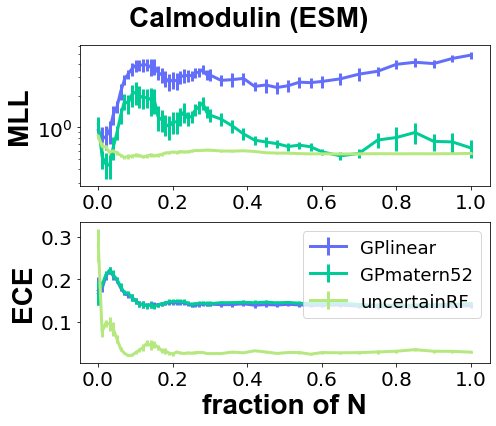

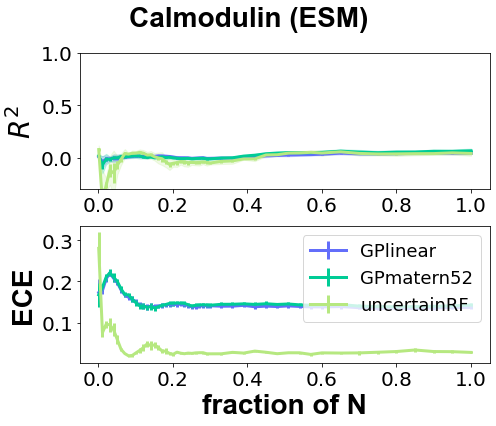

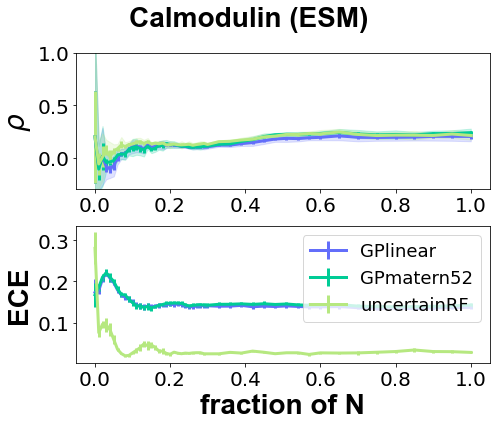

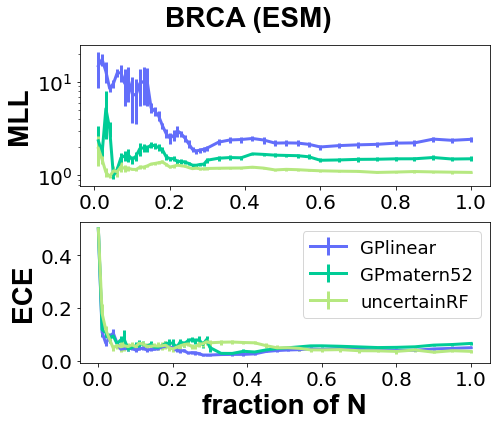

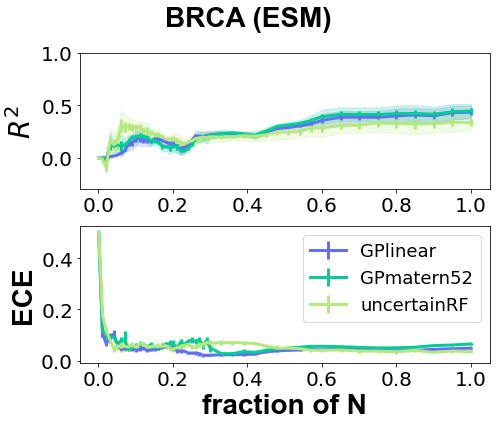

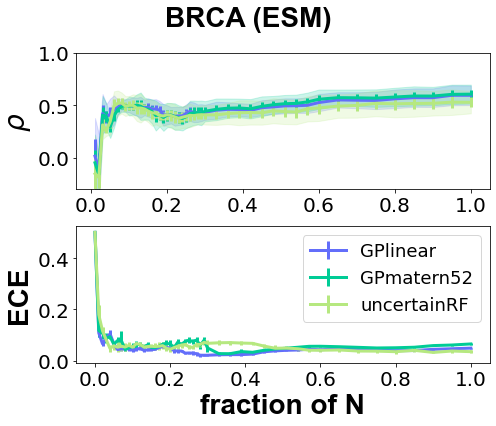

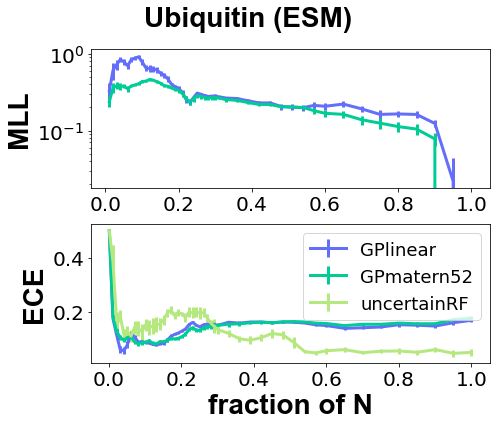

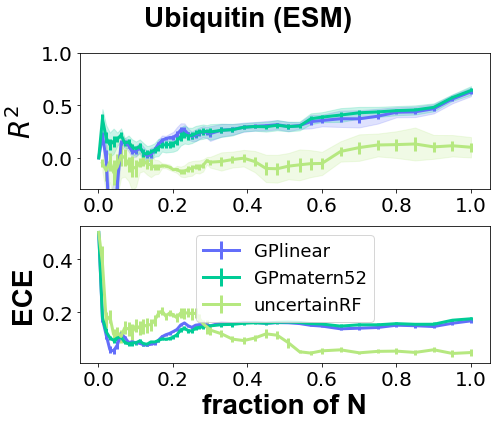

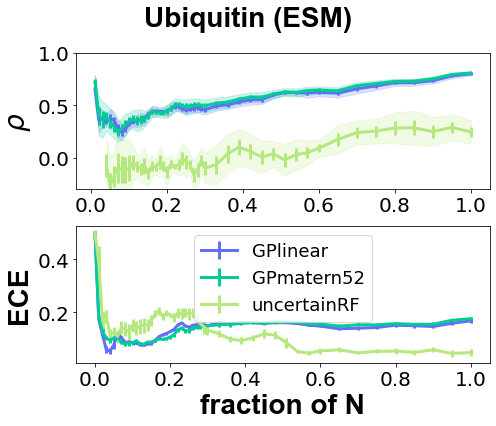

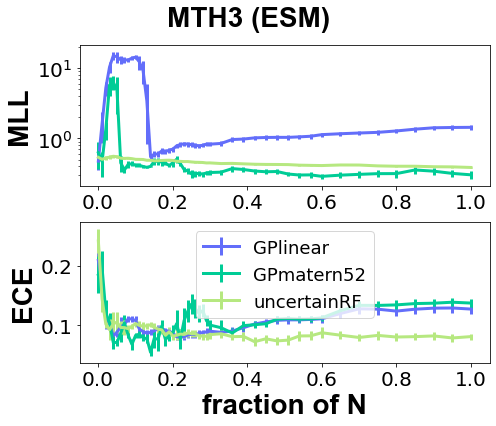

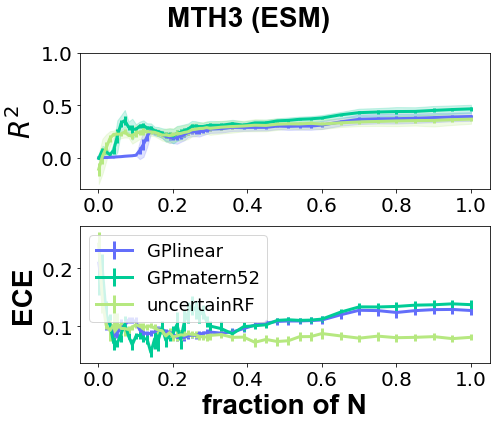

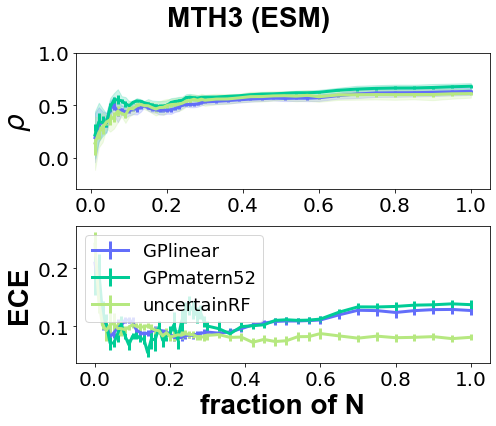

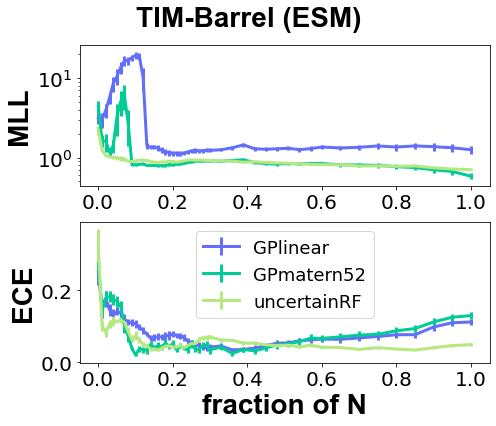

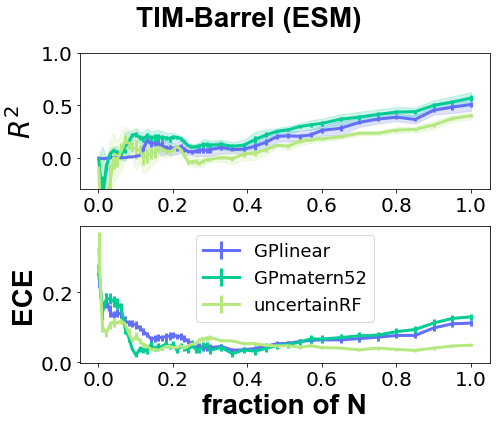

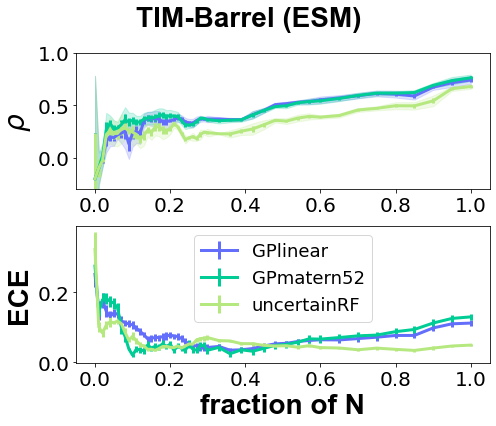

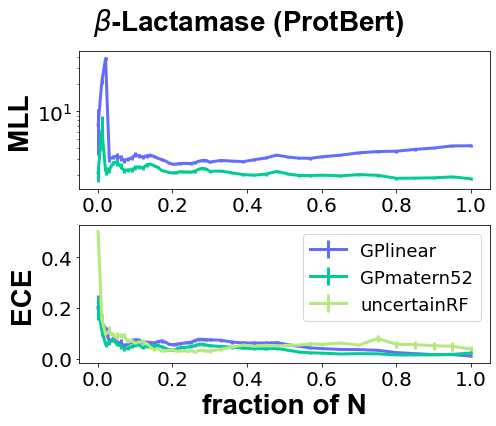

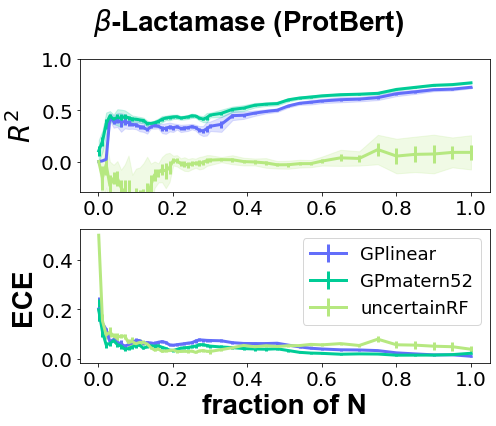

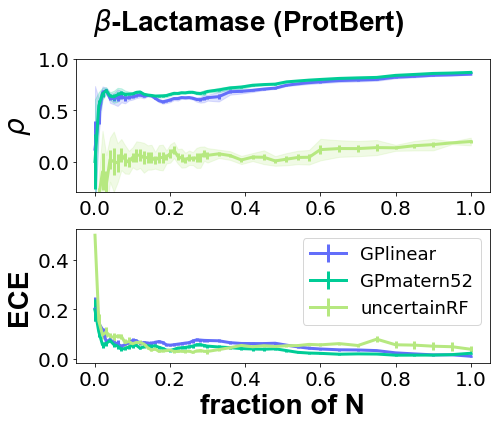

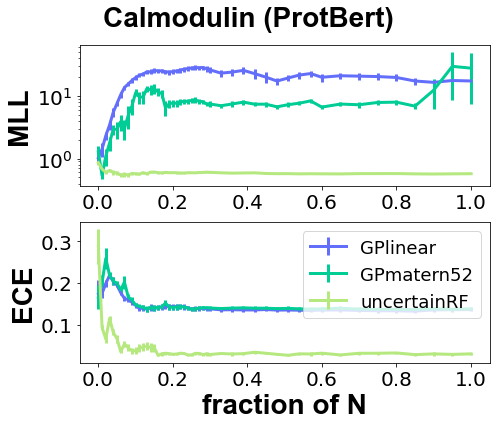

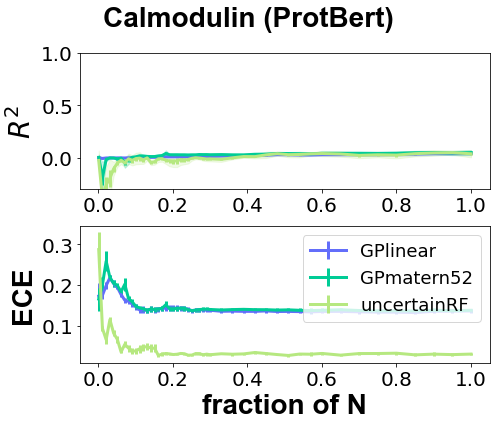

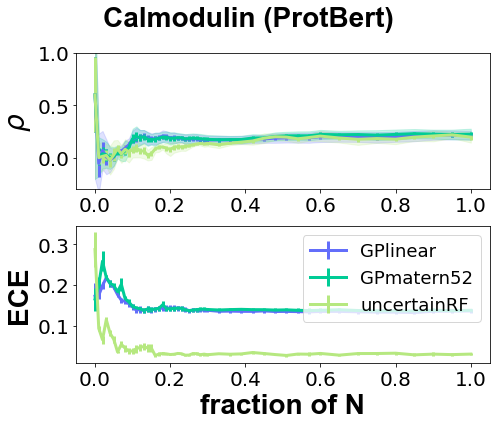

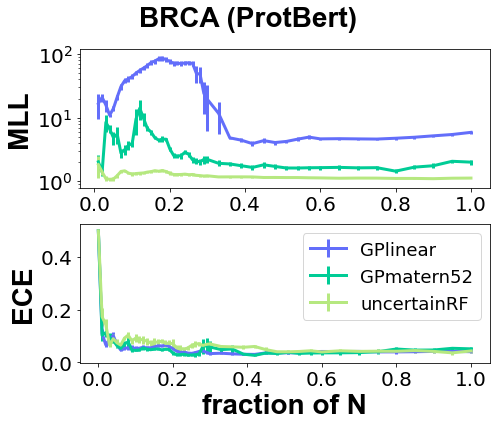

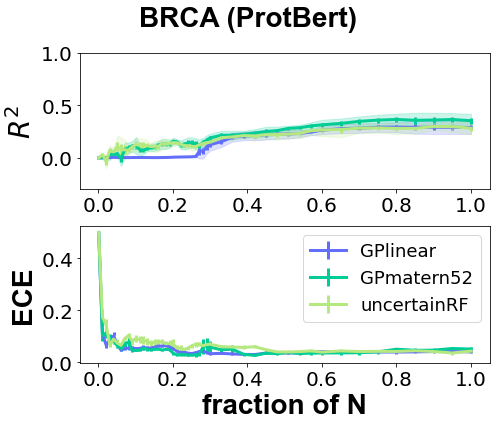

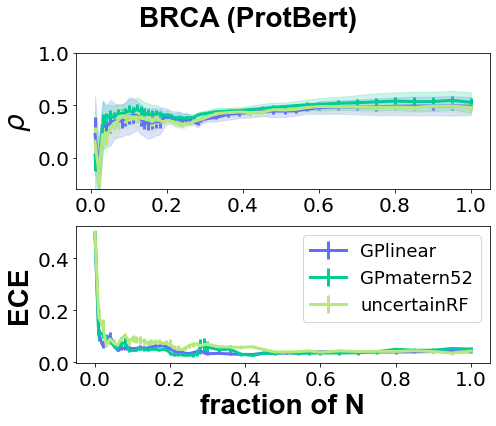

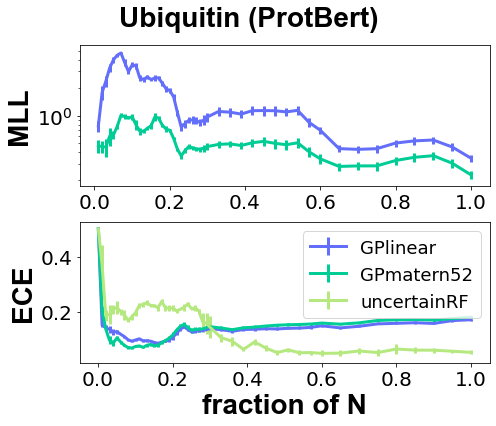

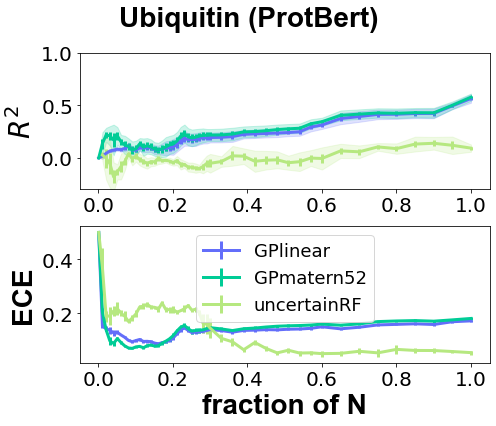

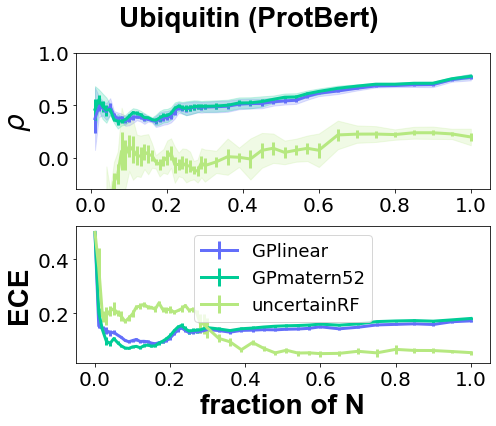

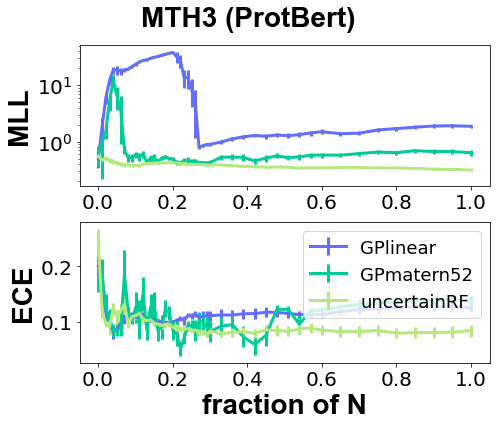

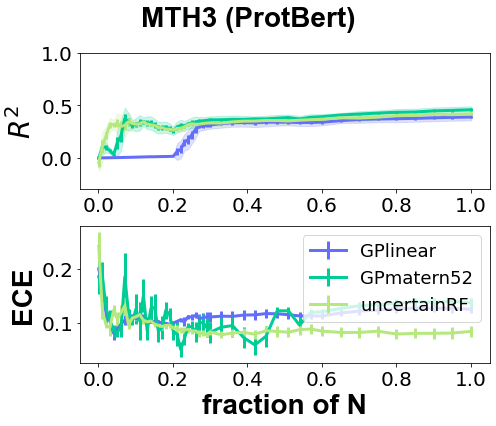

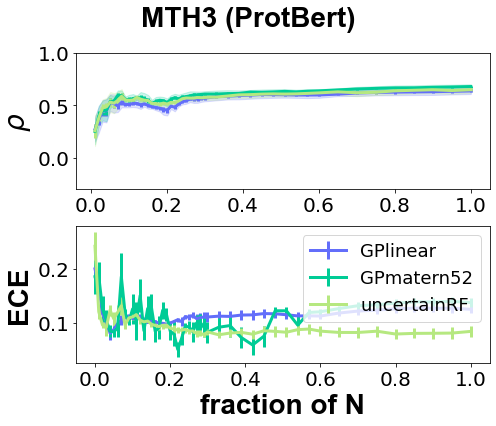

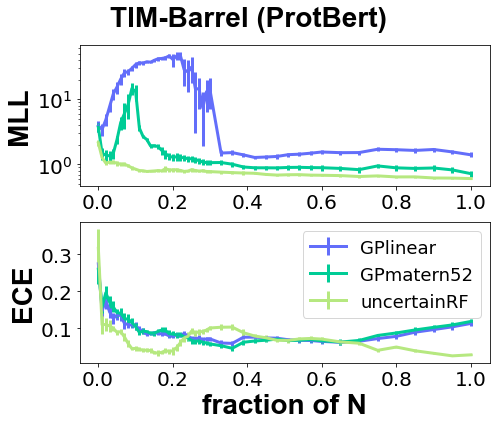

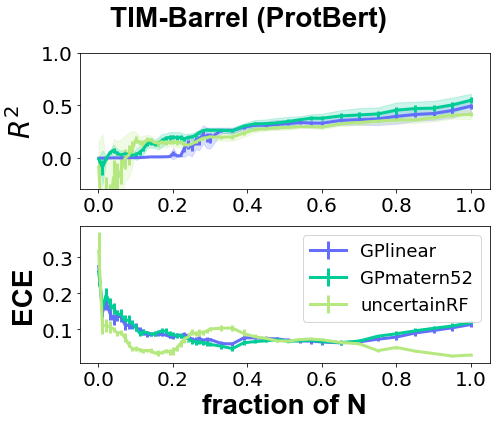

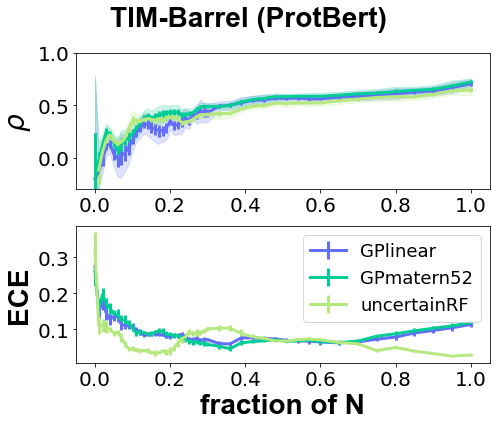

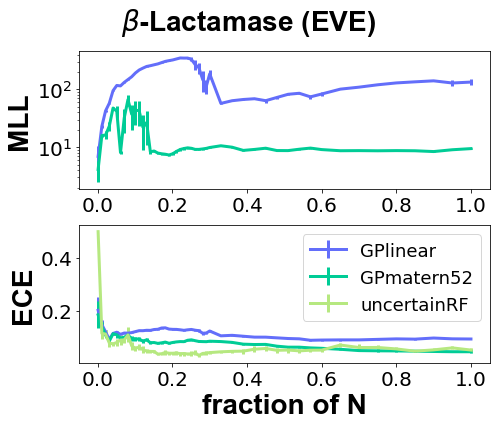

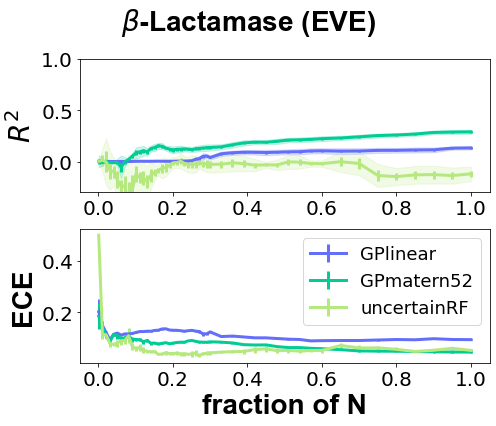

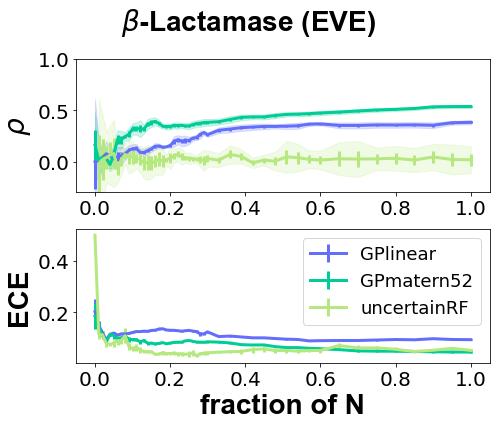

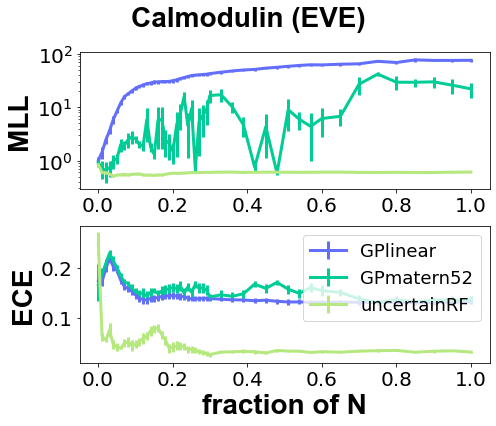

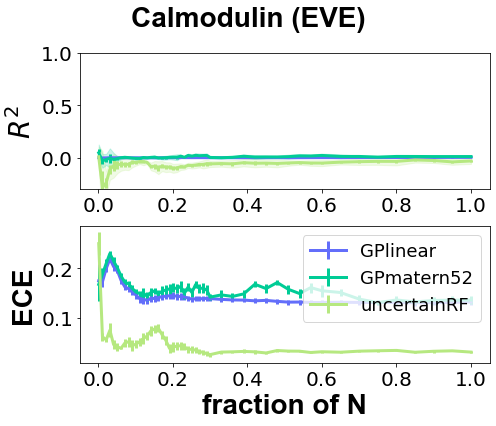

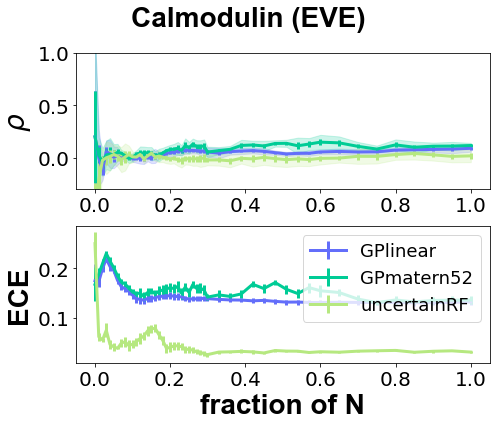

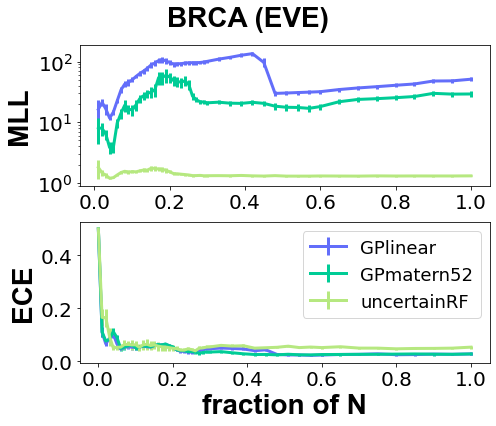

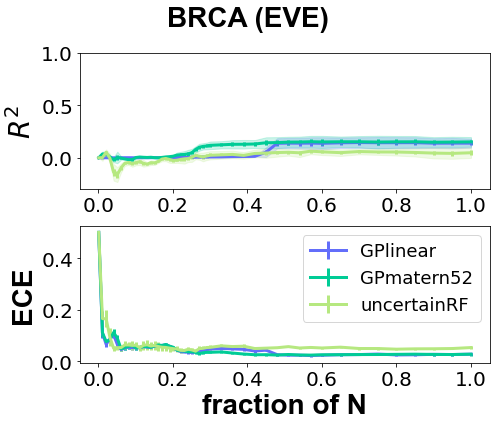

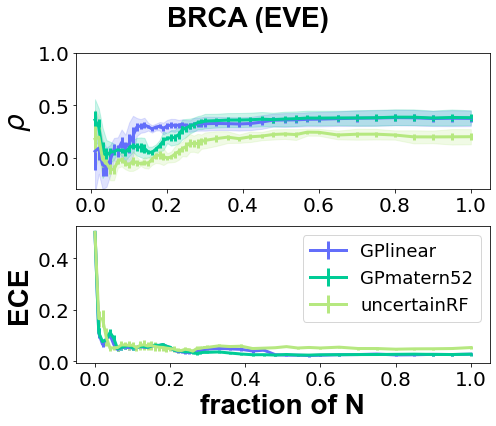

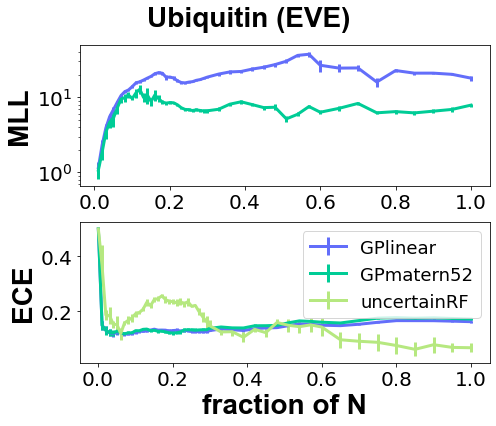

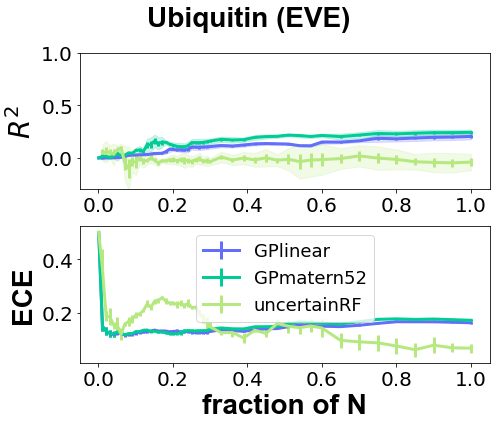

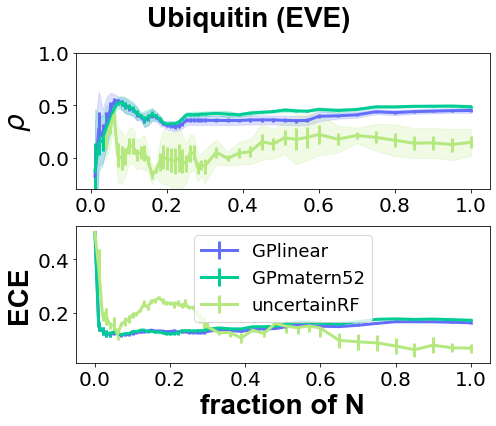

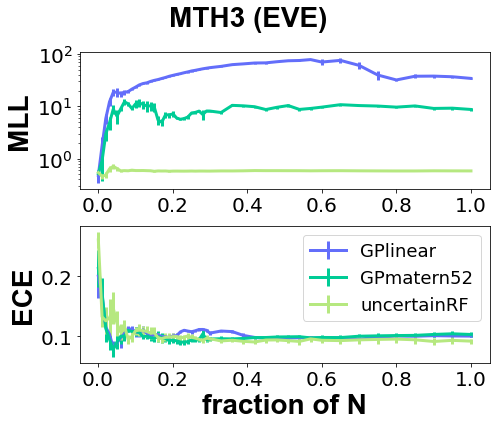

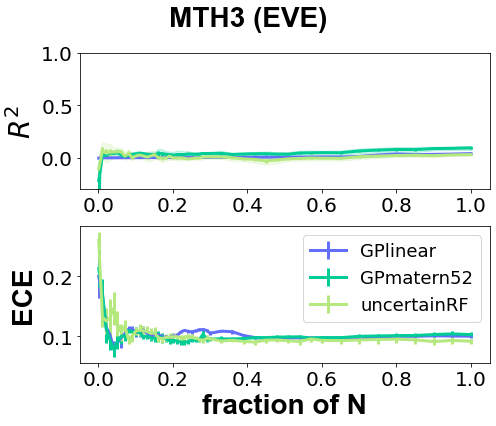

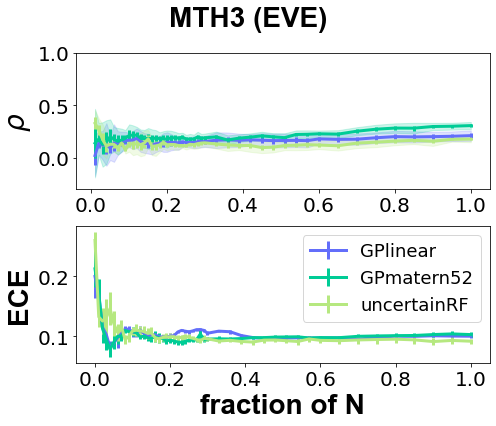

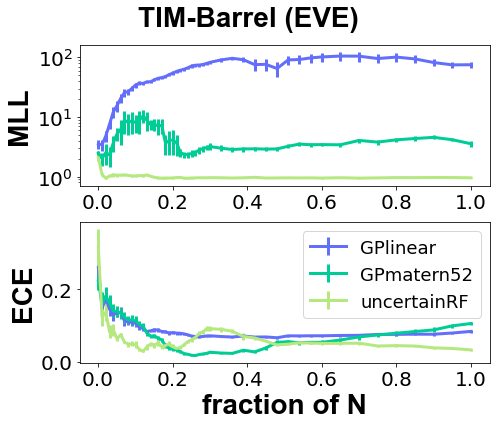

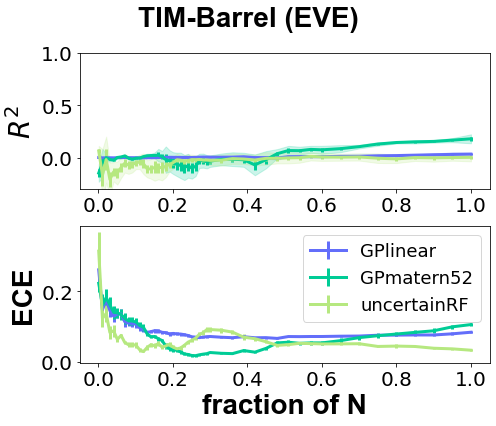

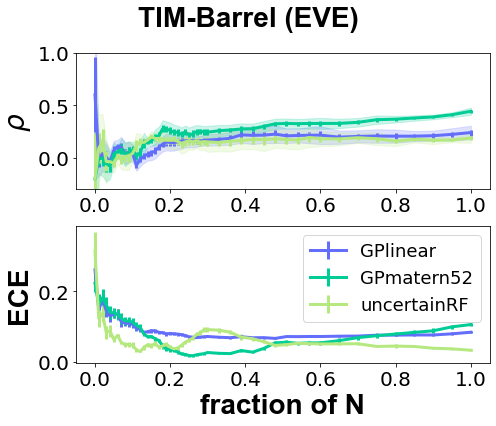

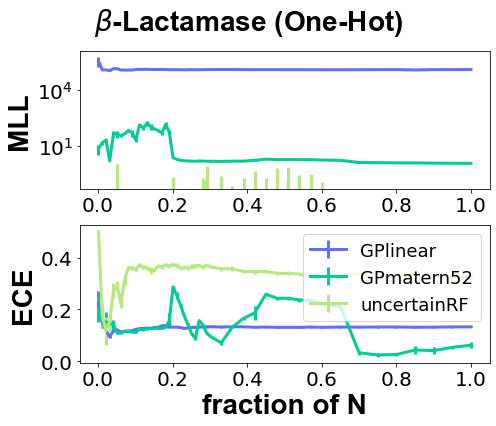

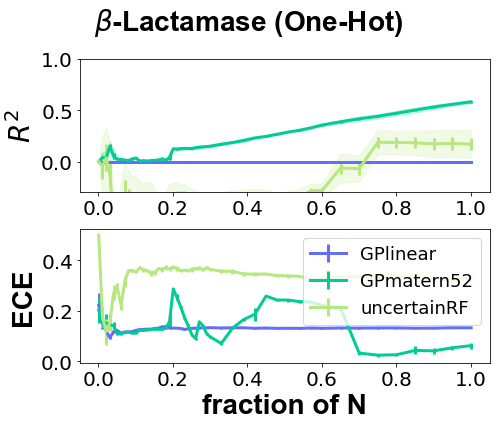

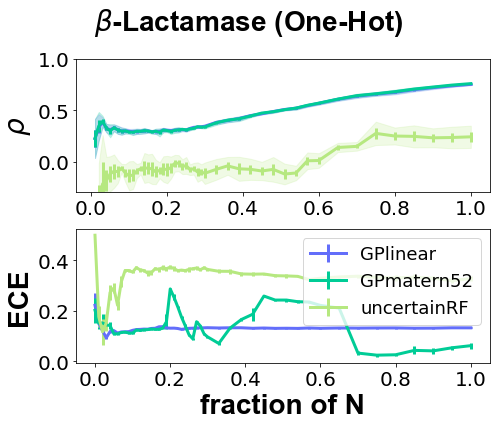

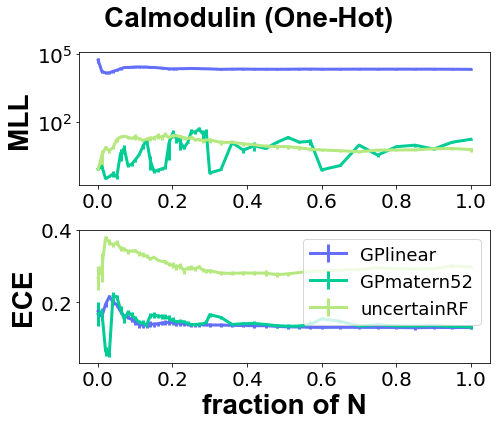

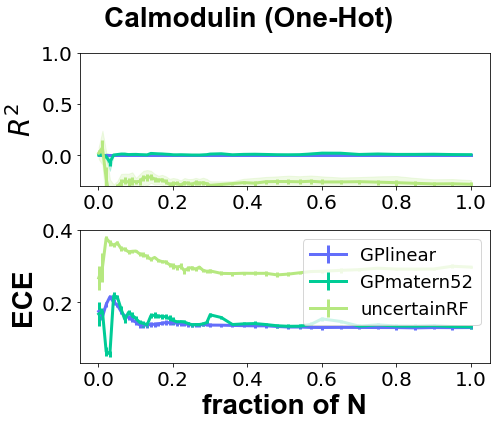

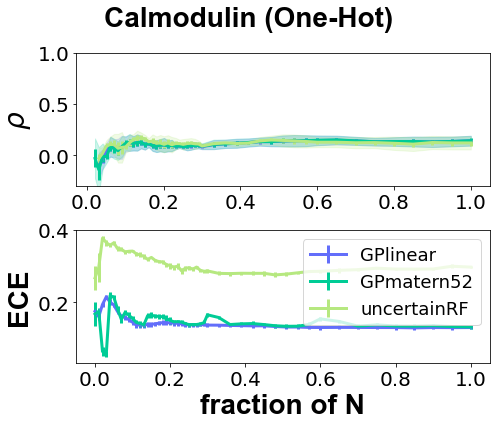

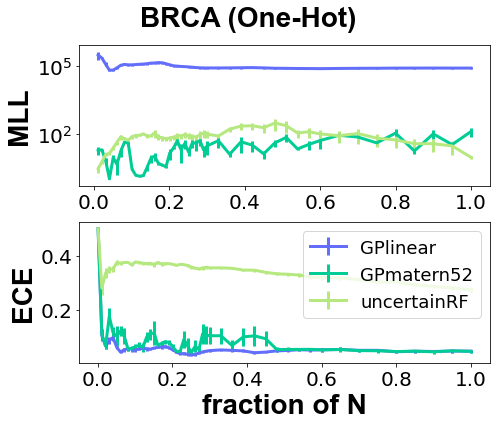

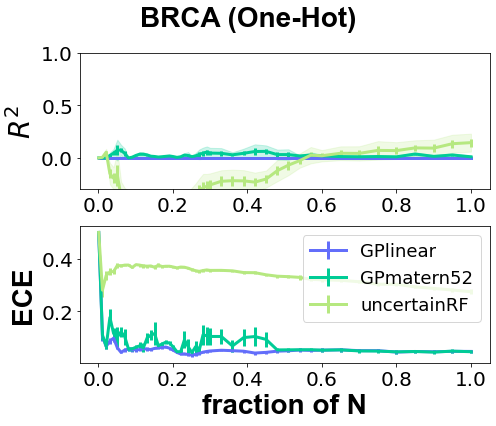

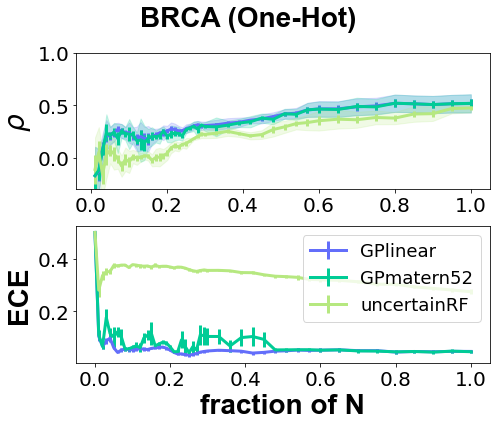

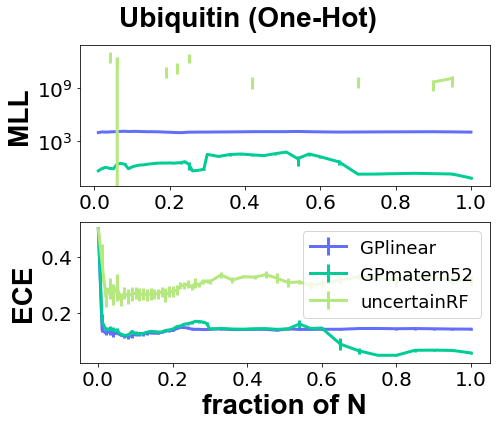

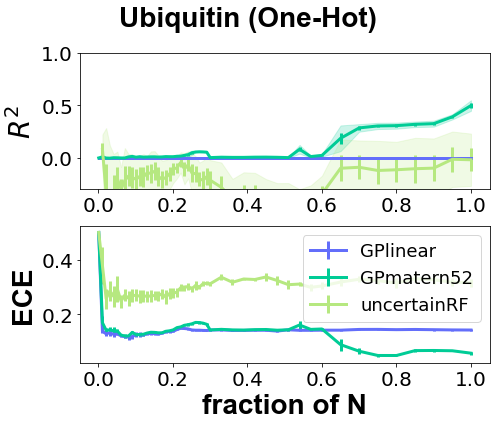

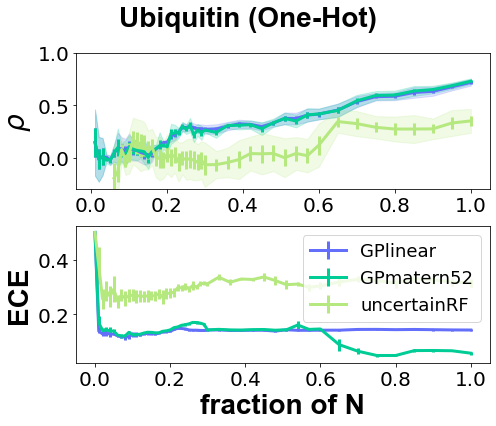

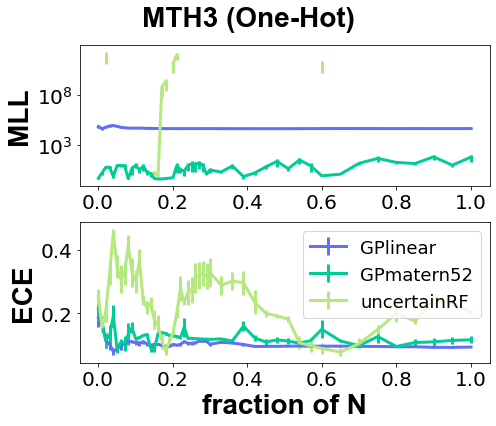

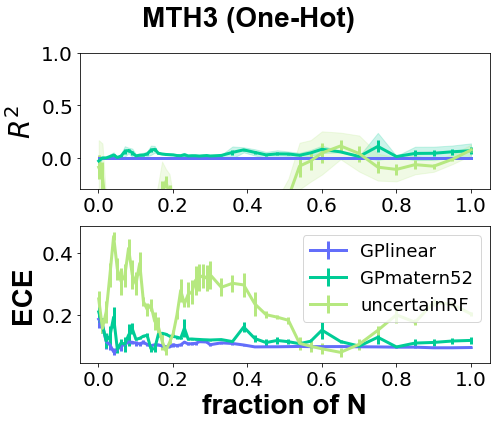

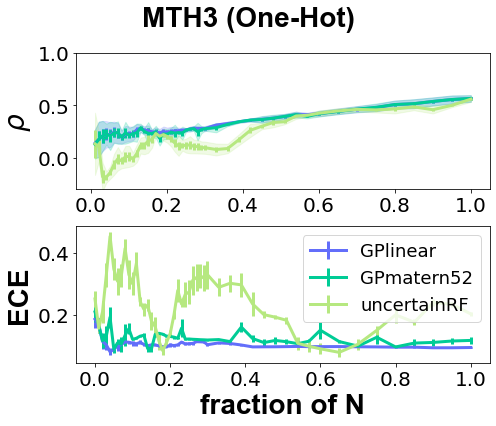

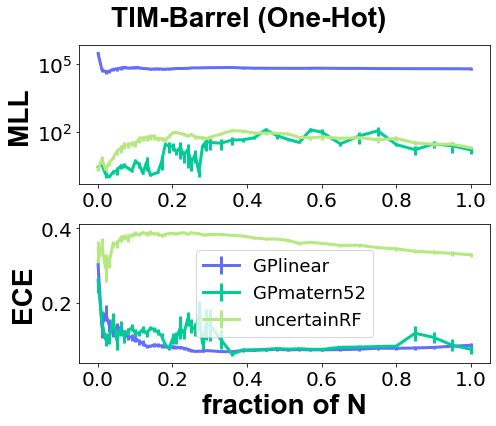

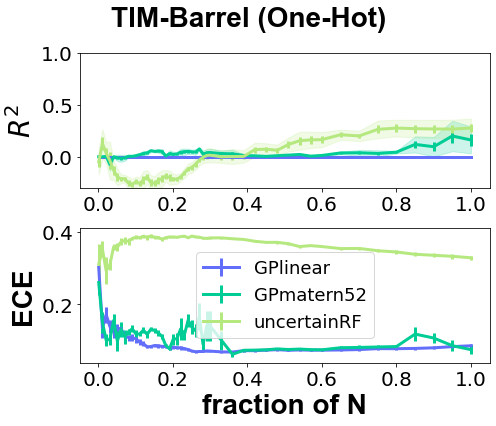

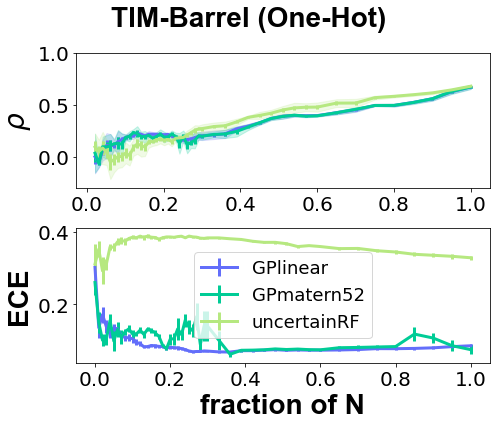

In [11]:
# gathers all our results and saves them into a numpy array
testing_fractions = np.concatenate([np.arange(0.001, .3, 0.01), np.arange(.3, .6, 0.03), np.arange(.6, 1.05, 0.05)])

train_test_splitters = [FractionalRandomSplitter("1FQG", n) for n in testing_fractions]
for rep in [ESM, TRANSFORMER, EVE, ONE_HOT]:    
    plot_cumulative_comparison(datasets=["1FQG", "CALM", "BRCA", "UBQT", "MTH3", "TIMB"], 
    algos=[GPonRealSpace().get_name(), GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(),
    UncertainRandomForest().get_name()], 
    metrics=[MLL, MSE, GP_L_VAR, STD_Y, SPEARMAN_RHO], 
    reps=[rep], 
    train_test_splitters=train_test_splitters,
    testing_fractions=testing_fractions,
    dimension=None,
    dim_reduction=LINEAR, 
    threshold=[None], 
    cached_results=True, 
    savefig=False)

### Optimization Results

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


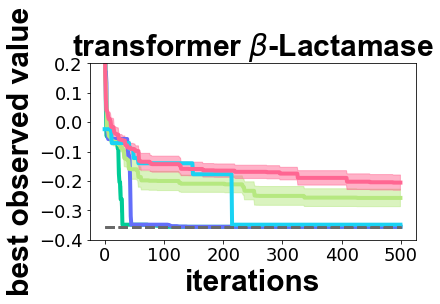

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


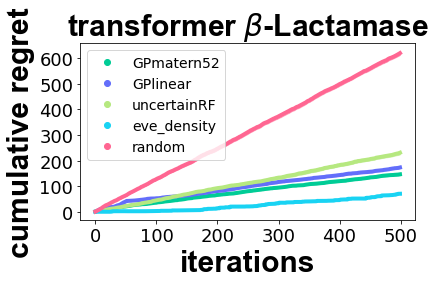

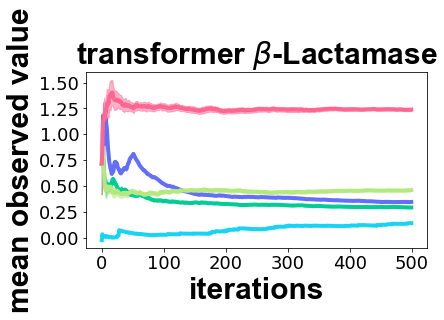

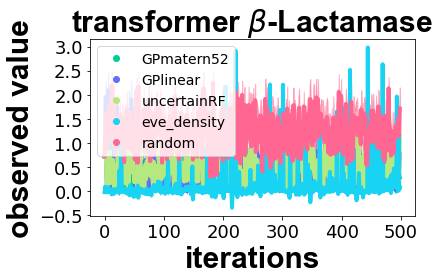

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


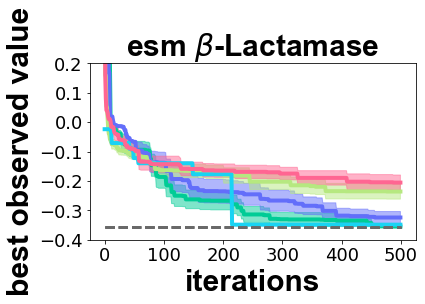

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


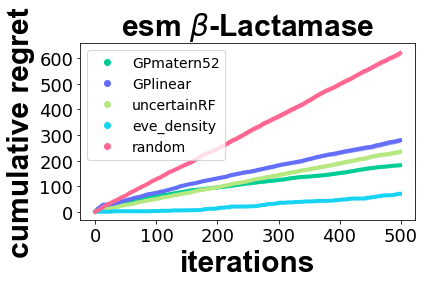

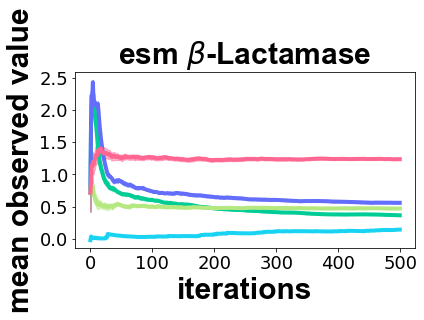

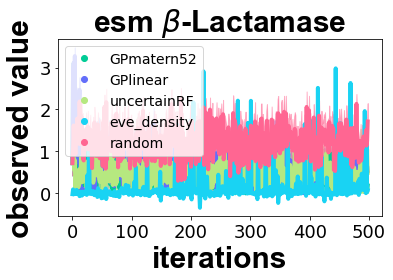

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


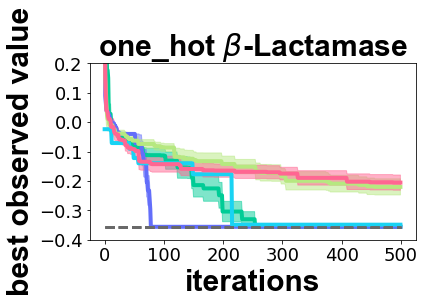

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


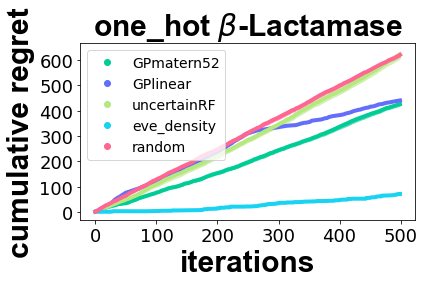

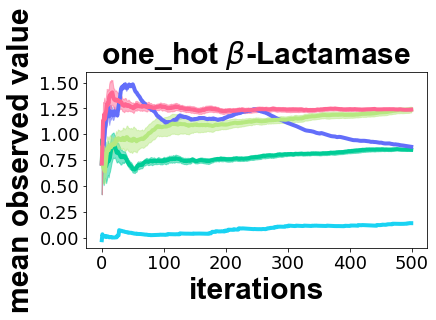

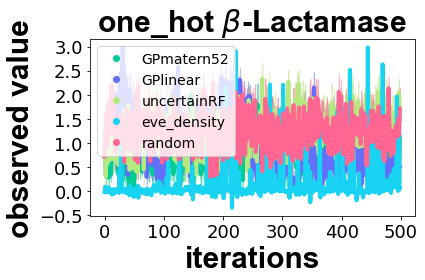

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


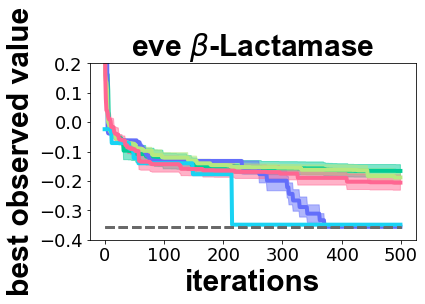

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


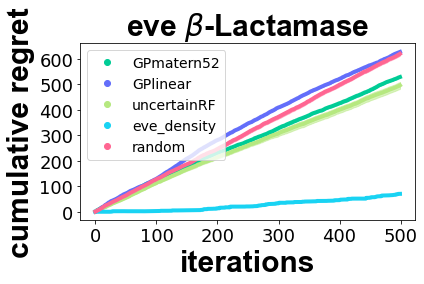

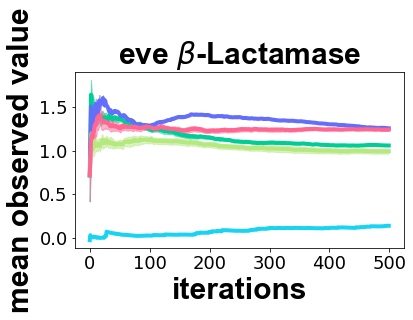

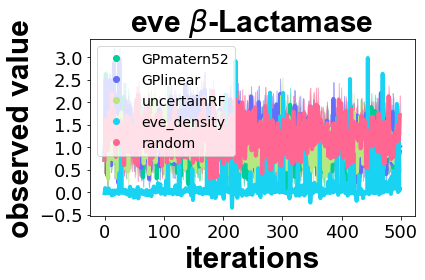

In [12]:
REFERENCE_REPRESENTATION = [EVE_DENSITY] # NOTE: reference is sort by evo-score

plot_optimization_results(["1FQG"], 
                        [GPonRealSpace(kernel_factory=lambda: Matern52()).get_name(), 
                        GPonRealSpace(kernel_factory=lambda: Linear()).get_name(), 
                        UncertainRandomForest().get_name()], 
                        [TRANSFORMER, ESM, ONE_HOT, EVE], 
                        RANDOM_SEEDS, 
                        REFERENCE_REPRESENTATION, 
                        plot_calibration=False,
                        cached_results=True,
                        savefig=False)